#Lead Scoring Case Study (Logistic Regression Module)

#**Problem Statement**


*   X Education acquires huge number of leads everyday, however current lead conversion rate is only ~30%.
*   The sales team spends significant time and effort reaching out to all leads, many of whom do not convert.
*   Company wants to identify high-potential leads (also called Hot Leads) to improve efficiency and conversion rates.
* The goal is to increase the lead conversion rate to around 80% by prioritising the most promising leads.  

**Business Impacts:**
* Higher conversion rates → More revenue.
* Optimized sales efforts → Focus on quality leads.
* Data-driven decision-making → Efficient resource allocation.

**Objectives**
* Develop a Lead Scoring Model using Logistic Regression.
* Identify Hot Leads with high probability of conversion.
* Improve lead conversion rate to 80%.
* Enhance sales team efficiency by focusing on quality leads







In [11]:
#mount my gDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#import needded modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Reading CSV file

In [13]:
#Load the data file ()'Lead.csv')
df=pd.read_csv('/content/drive/MyDrive/Logistic_ML/Leads.csv')
print("The shape of data is --->",df.shape)
df.head()

The shape of data is ---> (9240, 37)


Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

#Inspecting Data


In [14]:
# let's look at the statistical aspects of the dataframe
stats_df = pd.DataFrame(df.describe(include='all'))
stats_df

Prospect ID    Lead Number  \
count                                   9240    9240.000000   
unique                                  9240            NaN   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620            NaN   
freq                                       1            NaN   
mean                                     NaN  617188.435606   
std                                      NaN   23405.995698   
min                                      NaN  579533.000000   
25%                                      NaN  596484.500000   
50%                                      NaN  615479.000000   
75%                                      NaN  637387.250000   
max                                      NaN  660737.000000   

                    Lead Origin Lead Source Do Not Email Do Not Call  \
count                      9240        9204         9240        9240   
unique                        5          21            2           2   
top     Landing Page Submission      Google           No          No   
freq                       4886        2868         8506        9238   
mean                        NaN         NaN          NaN         NaN   
std                         NaN         NaN          NaN         NaN   
min                         NaN         NaN          NaN         NaN   
25%                         NaN         NaN          NaN         NaN   
50%                         NaN         NaN          NaN         NaN   
75%                         NaN         NaN          NaN         NaN   
max                         NaN         NaN          NaN         NaN   

          Converted  TotalVisits  Total Time Spent on Website  \
count   9240.000000  9103.000000                  9240.000000   
unique          NaN          NaN                          NaN   
top             NaN          NaN                          NaN   
freq            NaN          NaN                          NaN   
mean       0.385390     3.445238                   487.698268   
std        0.486714     4.854853                   548.021466   
min        0.000000     0.000000                     0.000000   
25%        0.000000     1.000000                    12.000000   
50%        0.000000     3.000000                   248.000000   
75%        1.000000     5.000000                   936.000000   
max        1.000000   251.000000                  2272.000000   

        Page Views Per Visit  ... Get updates on DM Content Lead Profile  \
count            9103.000000  ...                      9240         6531   
unique                   NaN  ...                         1            6   
top                      NaN  ...                        No       Select   
freq                     NaN  ...                      9240         4146   
mean                2.362820  ...                       NaN          NaN   
std                 2.161418  ...                       NaN          NaN   
min                 0.000000  ...                       NaN          NaN   
25%                 1.000000  ...                       NaN          NaN   
50%                 2.000000  ...                       NaN          NaN   
75%                 3.000000  ...                       NaN          NaN   
max                55.000000  ...                       NaN          NaN   

          City Asymmetrique Activity Index Asymmetrique Profile Index  \
count     7820                        5022                       5022   
unique       7                           3                          3   
top     Mumbai                   02.Medium                  02.Medium   
freq      3222                        3839                       2788   
mean       NaN                         NaN                        NaN   
std        NaN                         NaN                        NaN   
min        NaN                         NaN                        NaN   
25%        NaN                         NaN                        NaN   
50%        NaN                         NaN                  

In [15]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#Data Preprocessing

In [16]:
#check if duplicate values in df
print(df.duplicated().sum())


0


No Duplicate values in data

Check for Missing values and dropping colums where missing values are greater than 30 %

In [17]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Filter columns with more than 30% missing values
columns_to_drop = missing_percentage[missing_percentage > 30].index
print(columns_to_drop)
df = df.drop(columns=columns_to_drop)
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)
df.info()

Index(['Tags', 'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')
Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education         

Following columns have null greater than 30 % 'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'

Creating bar plots for each categorical colums to have insight into data and also detect any data issue.

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


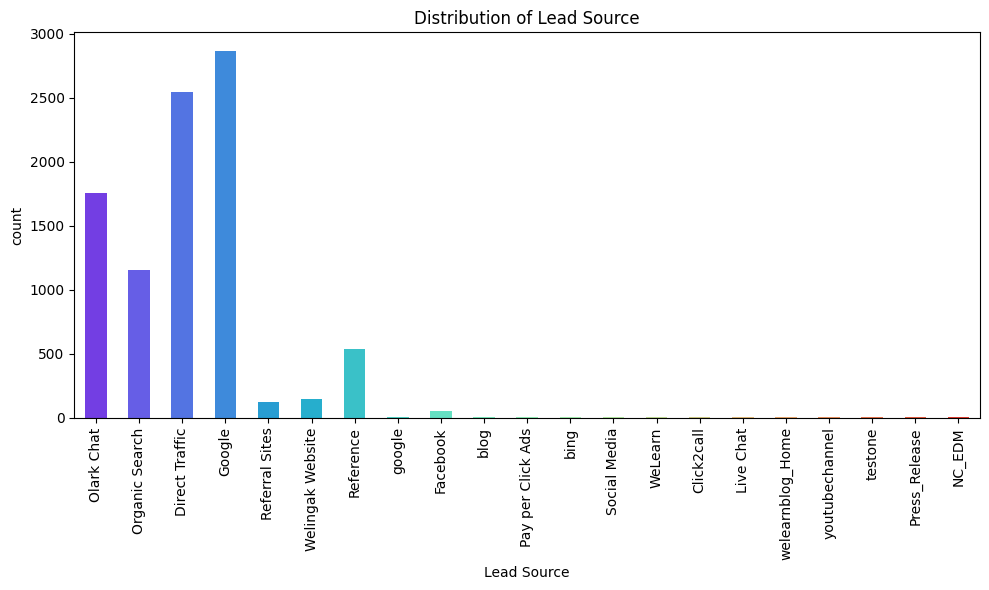

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


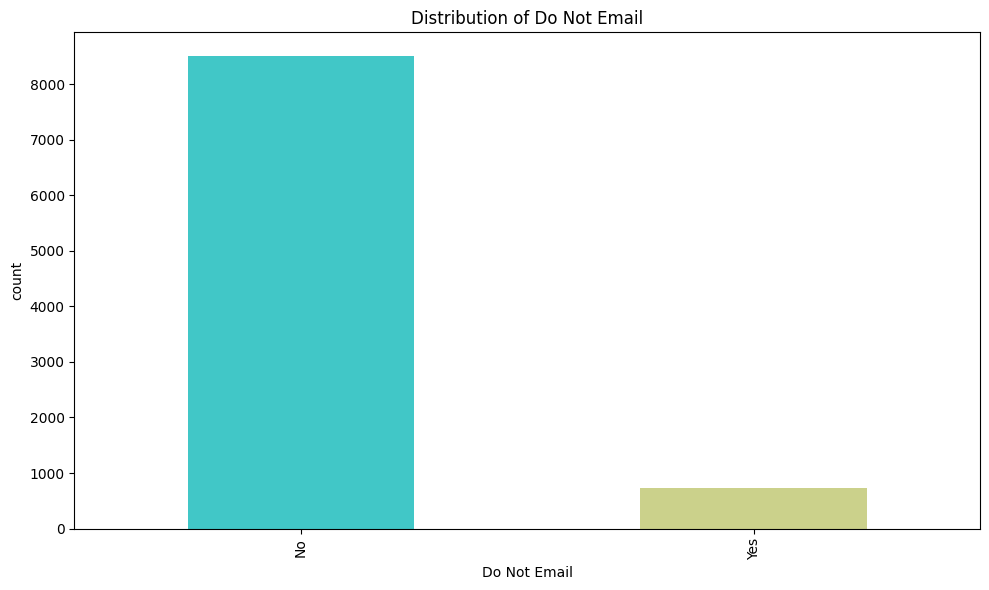

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


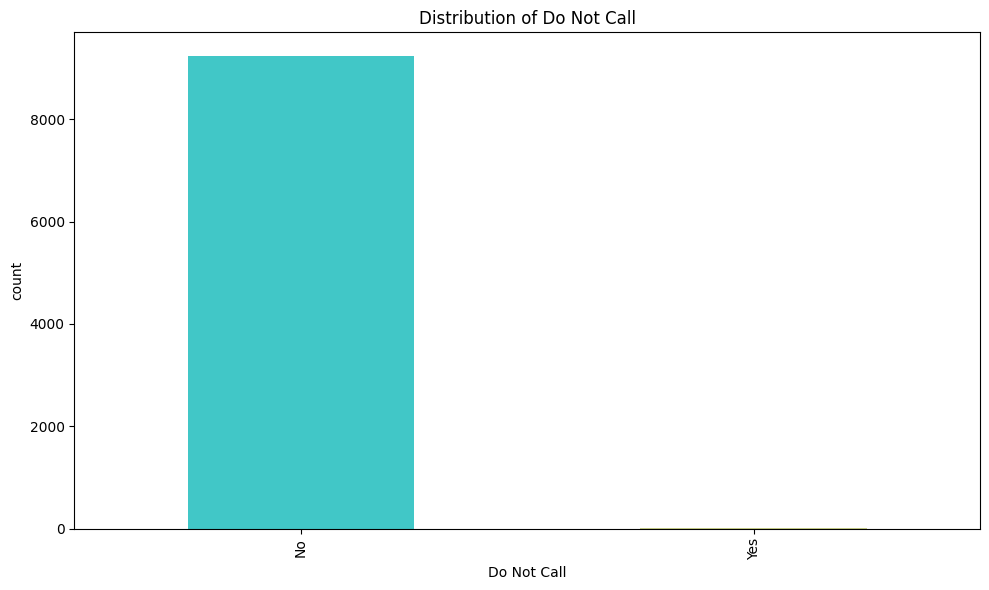

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


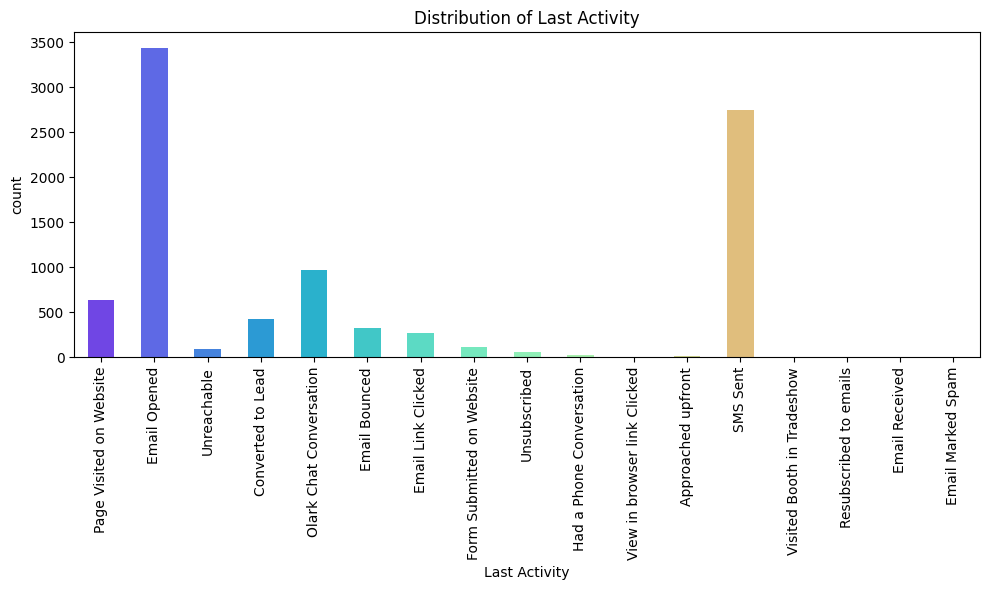

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


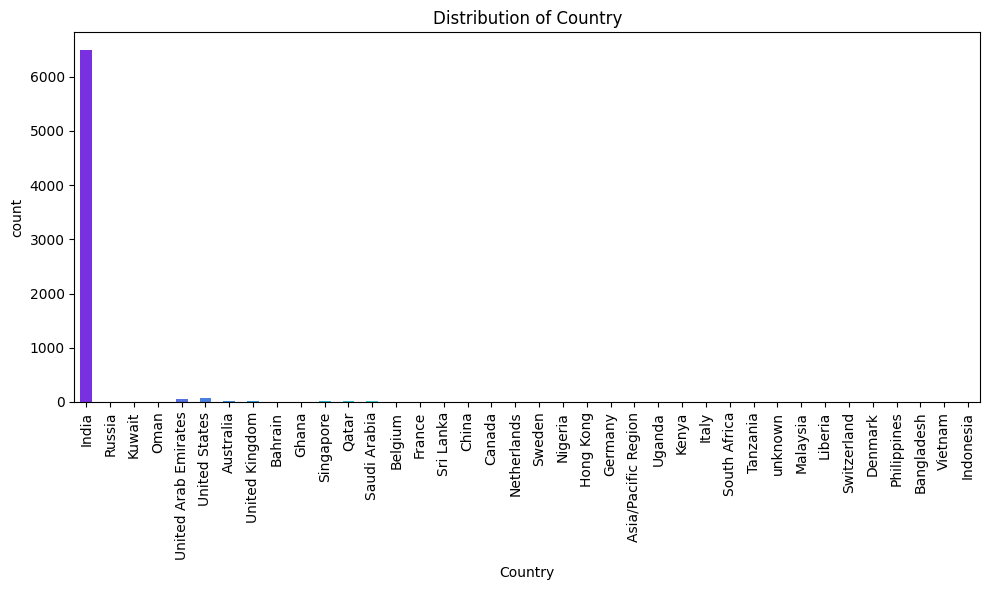

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


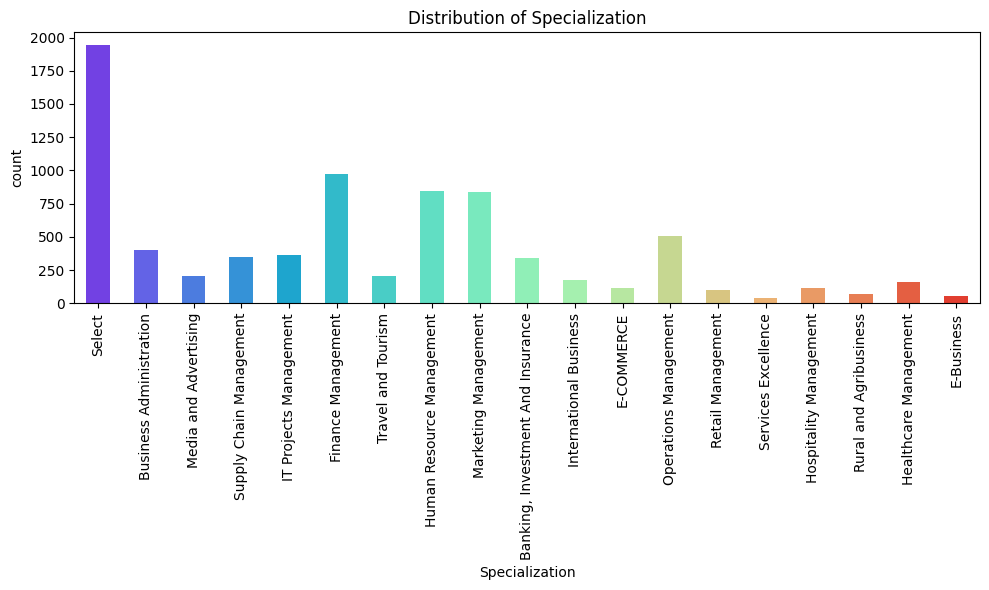

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


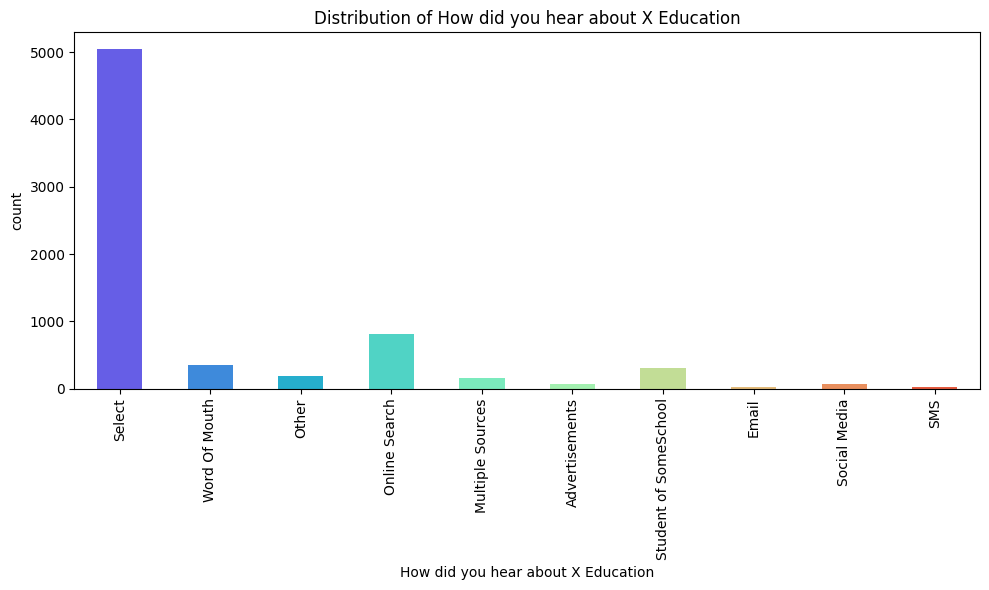

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


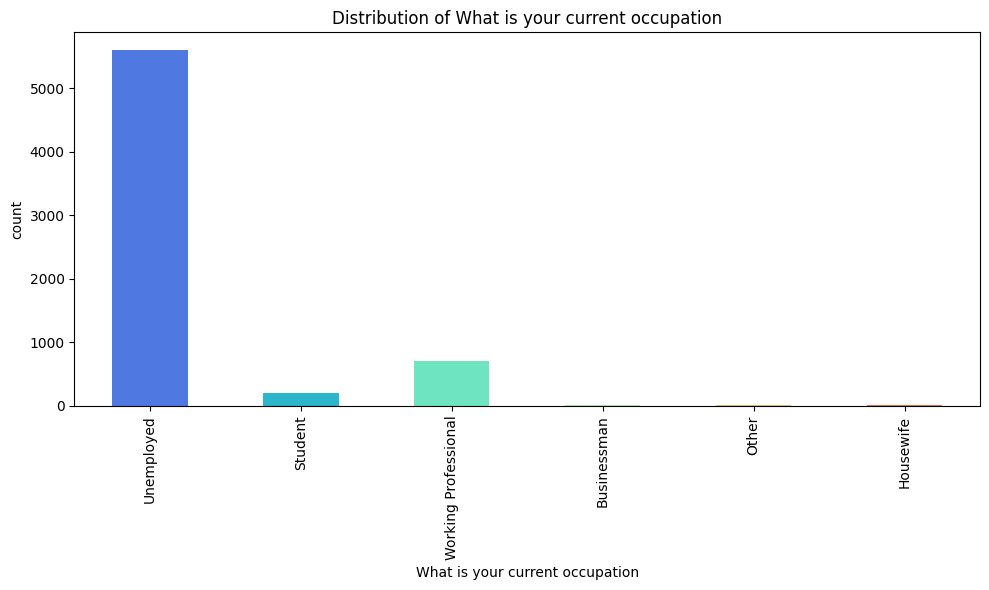

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


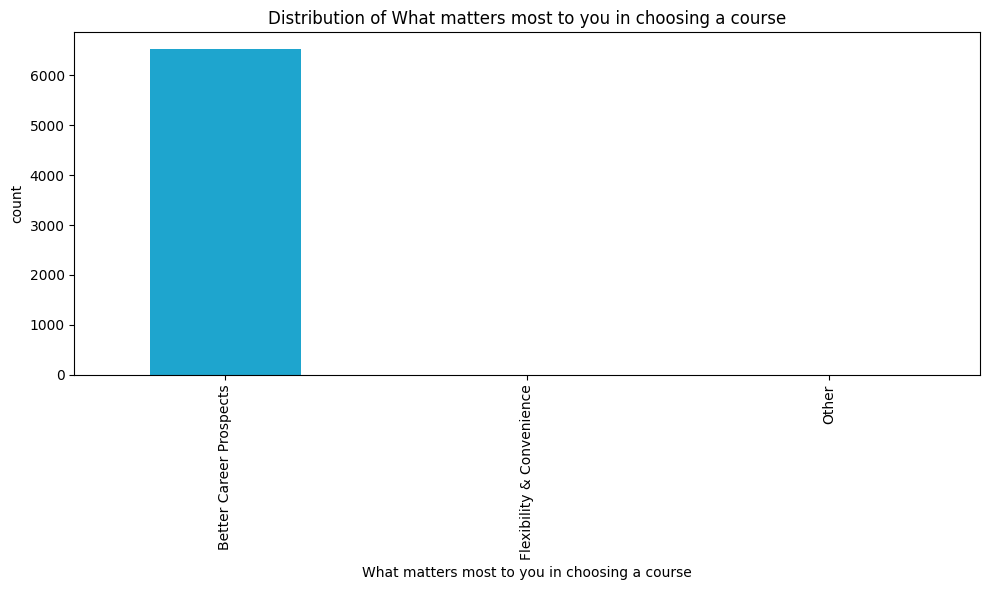

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


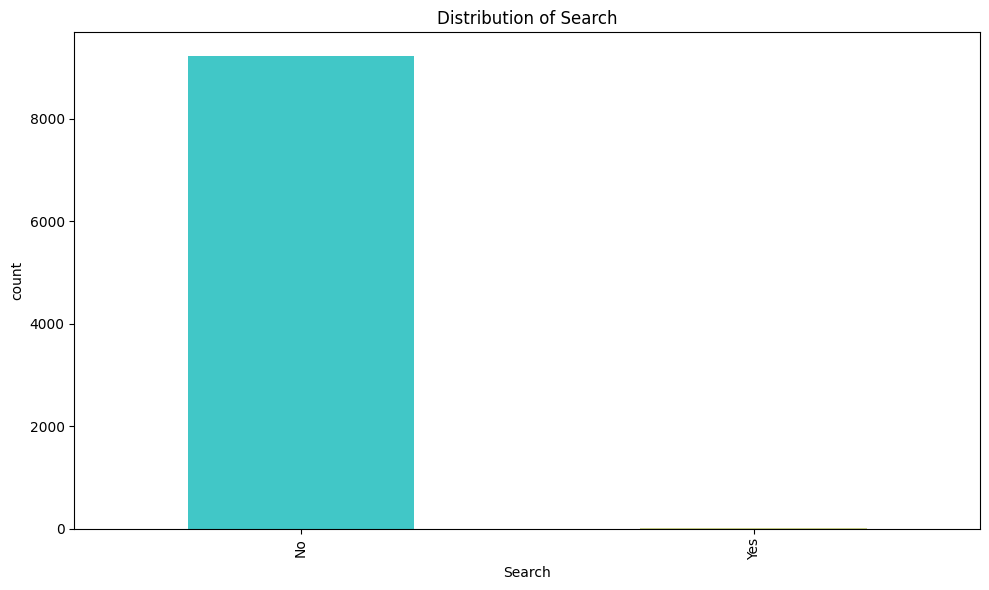

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


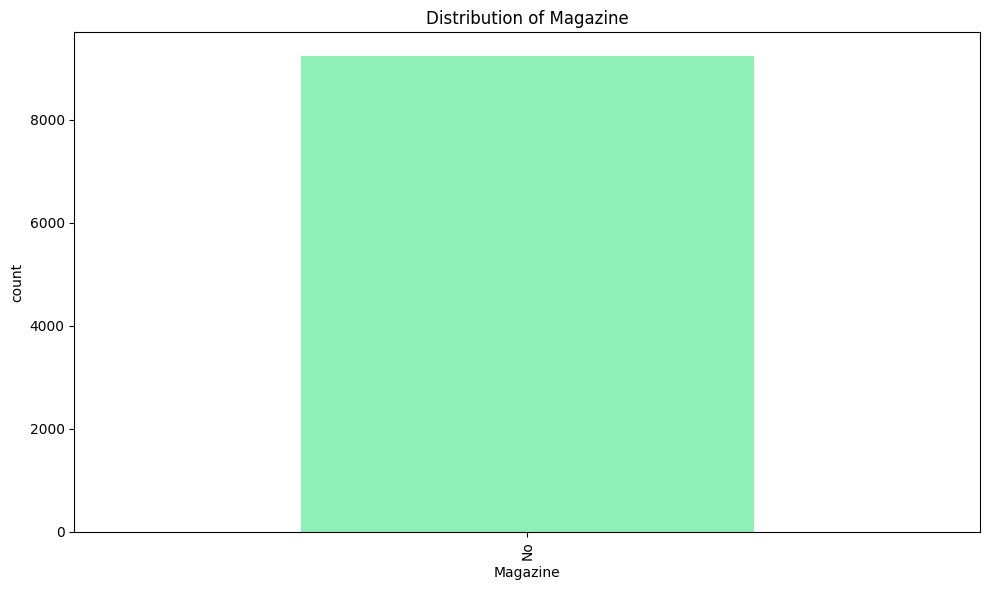

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


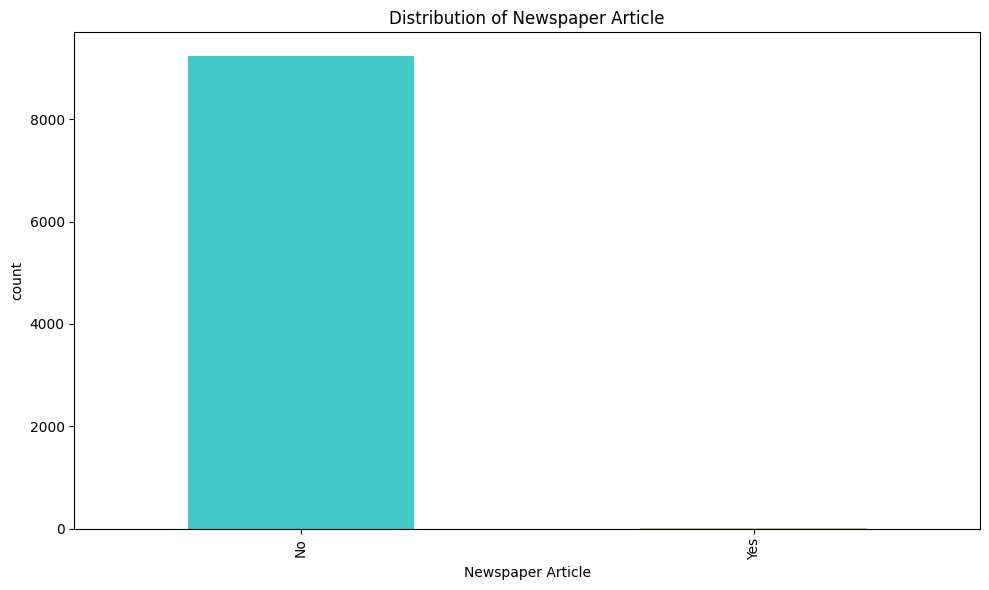

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


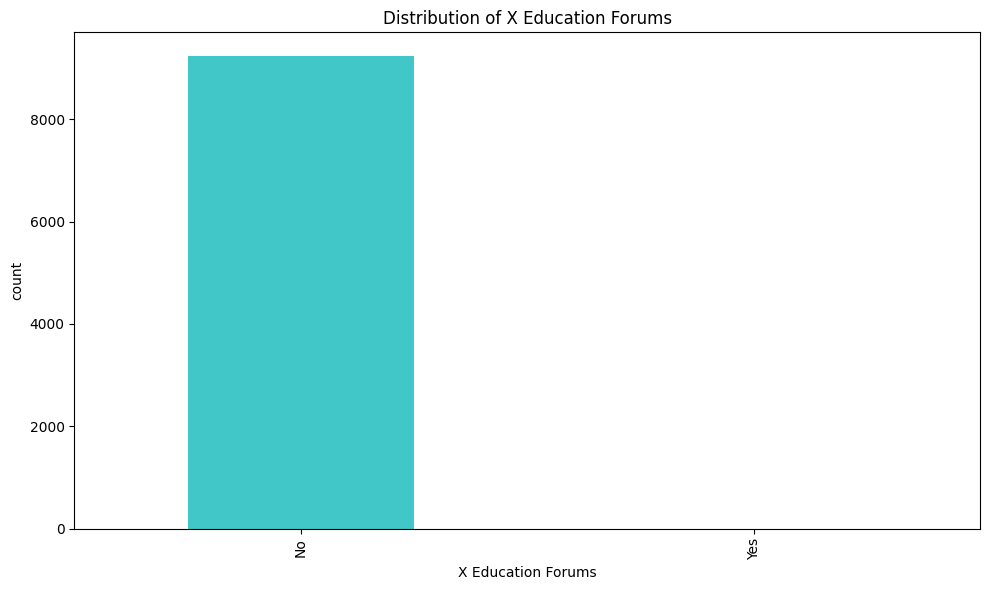

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


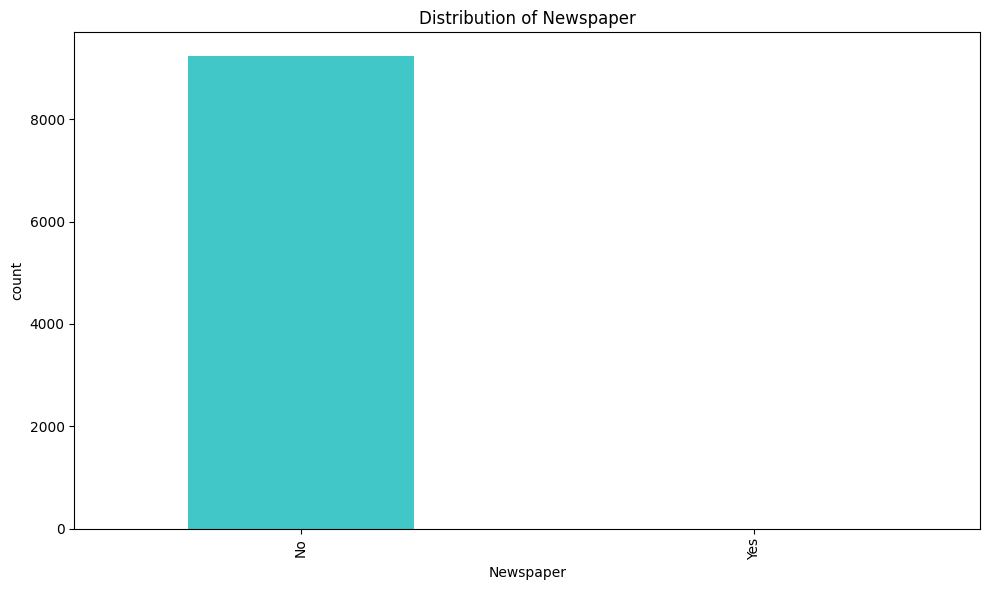

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


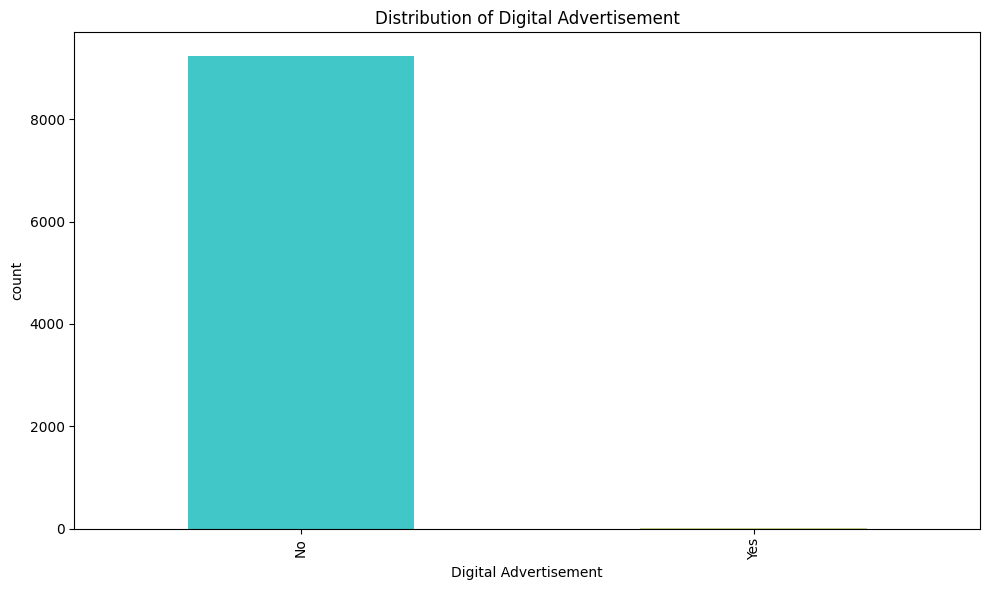

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


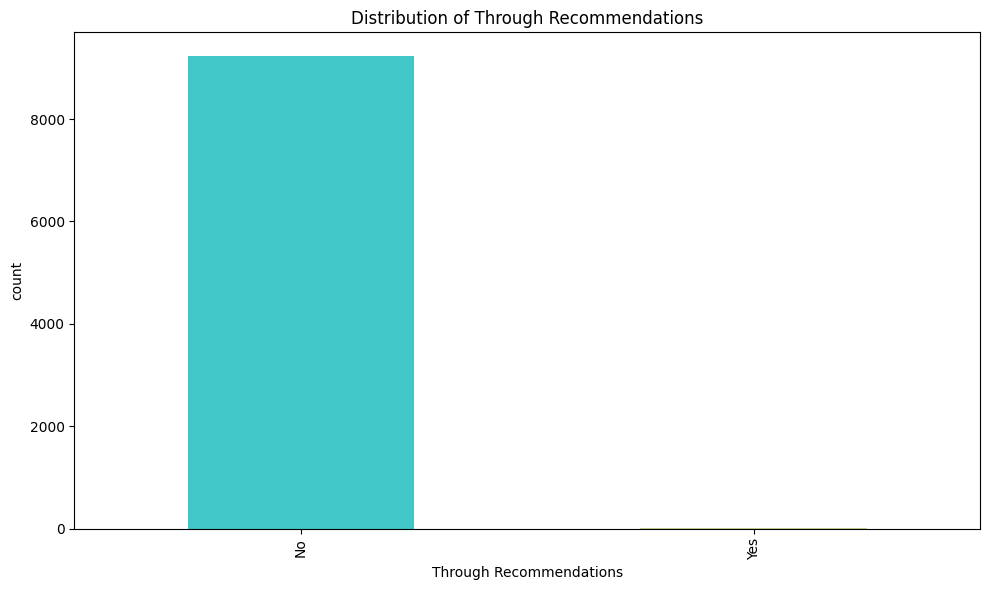

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


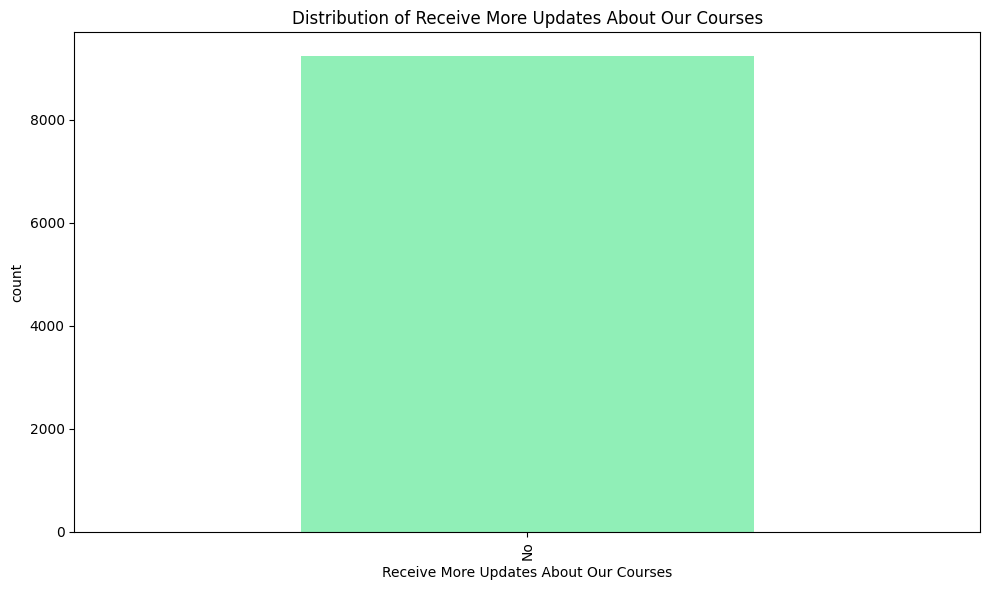

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


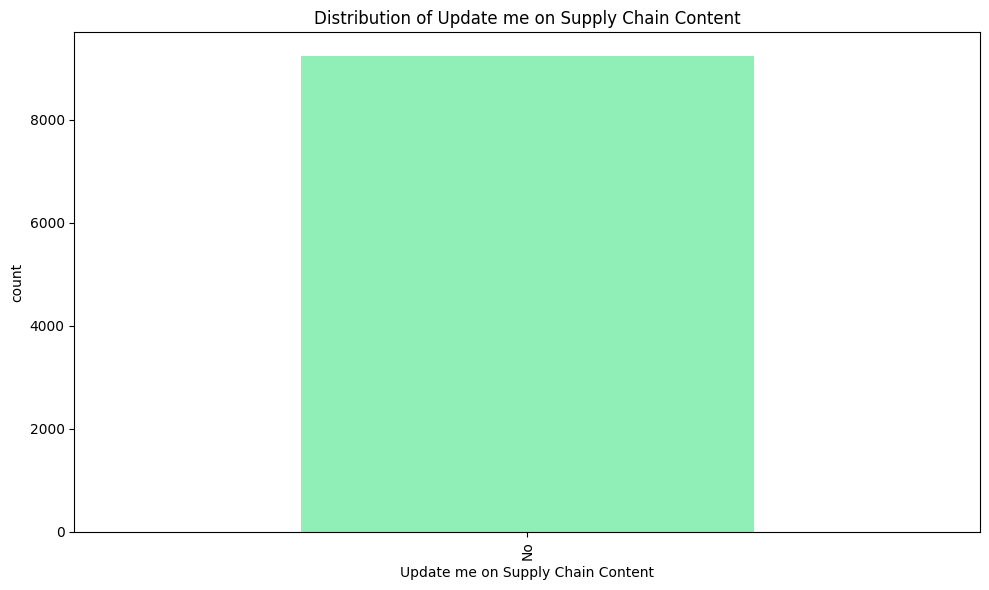

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


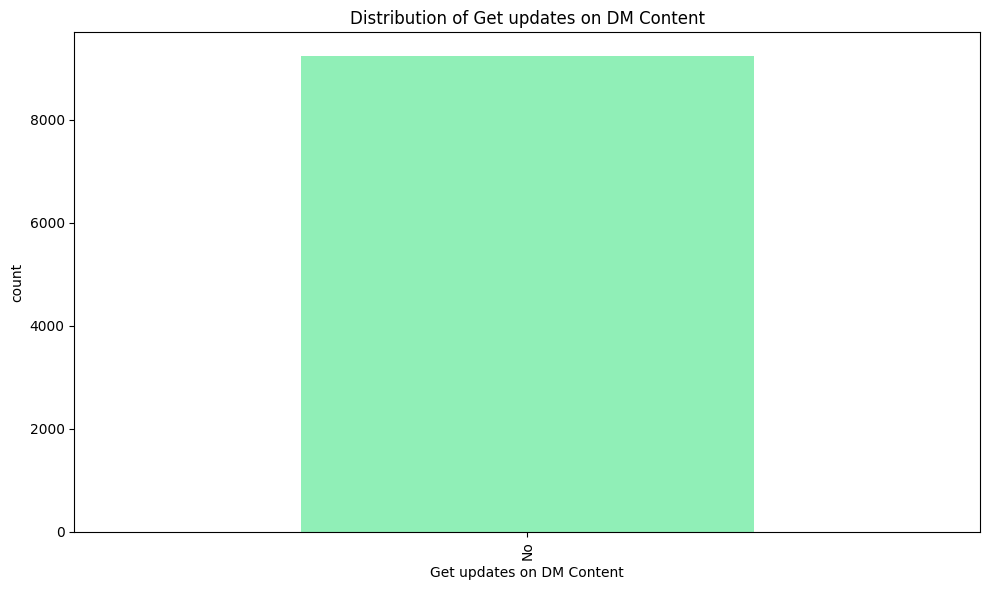

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


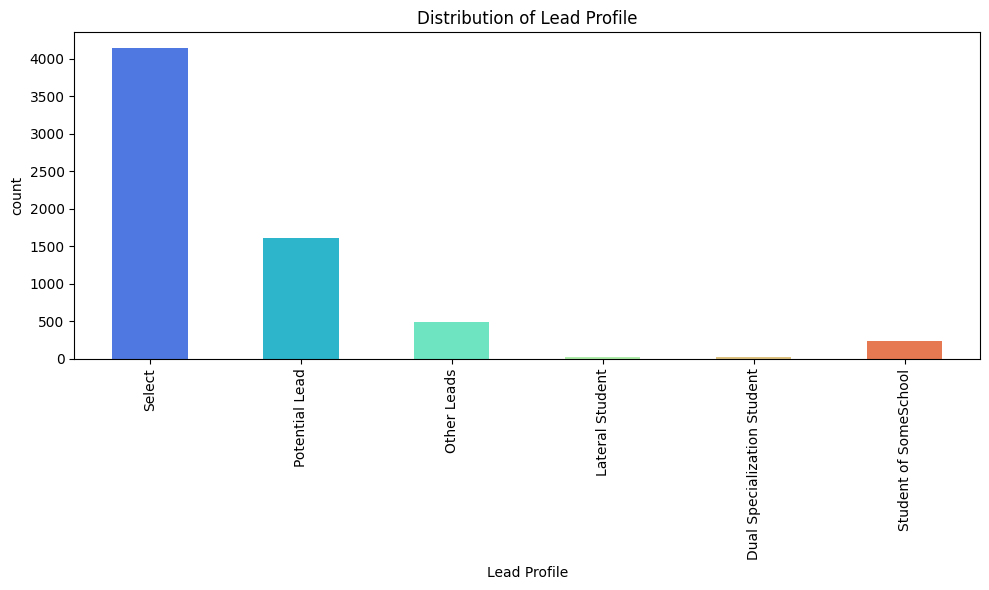

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


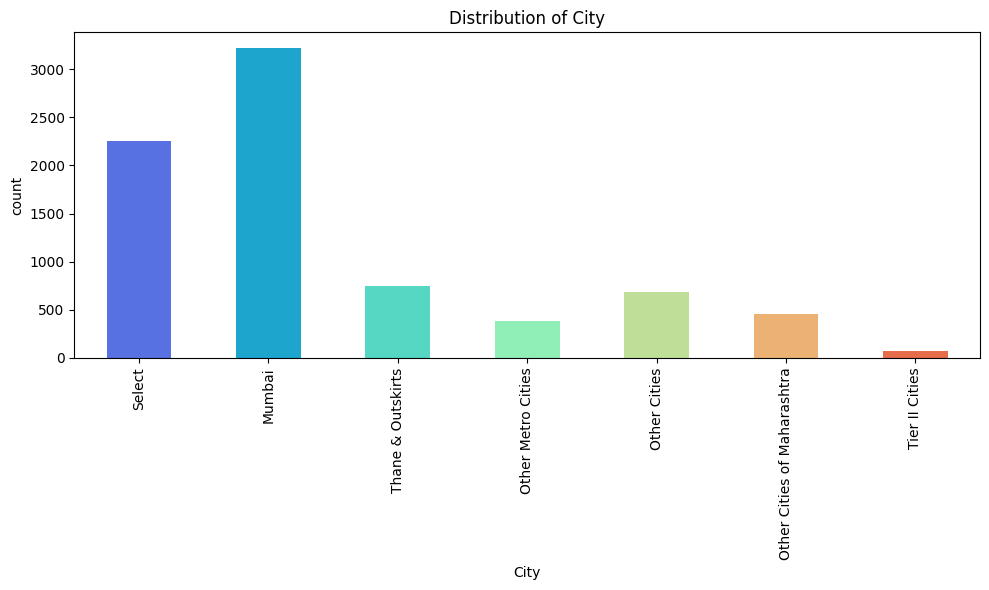

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


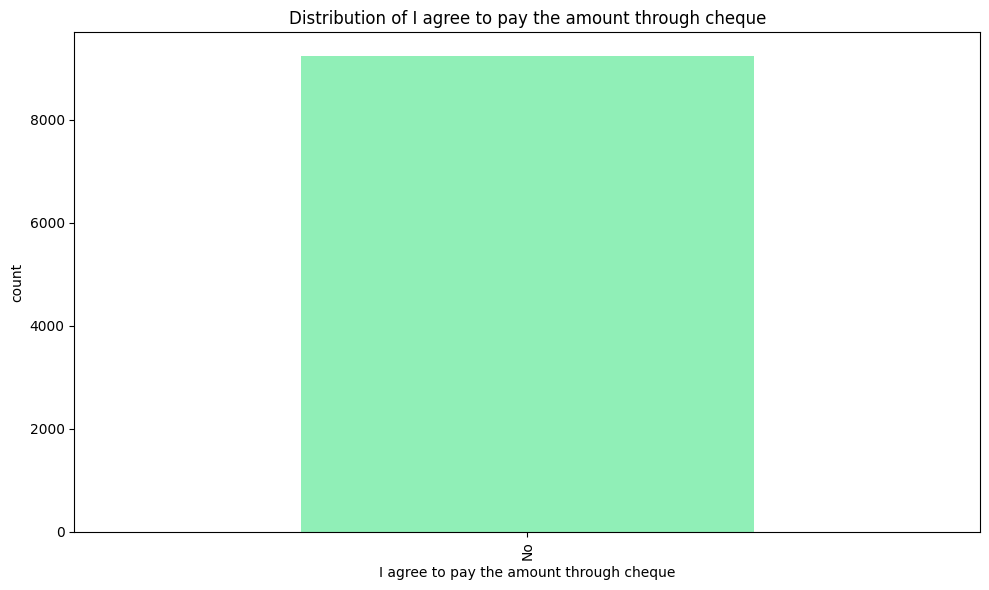

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


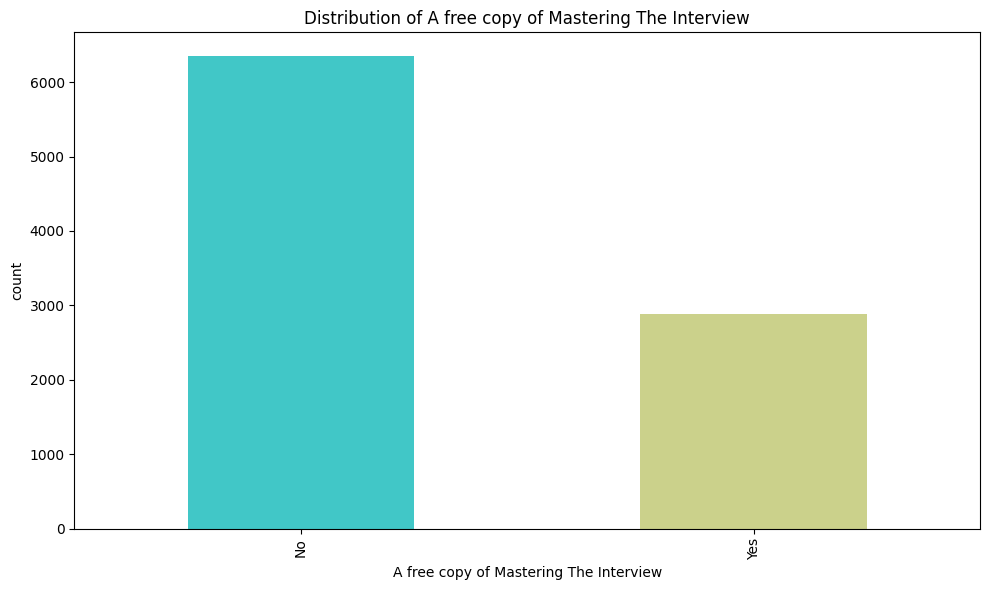

<ipython-input-18-8a8a36df0c4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='rainbow',width=0.5)


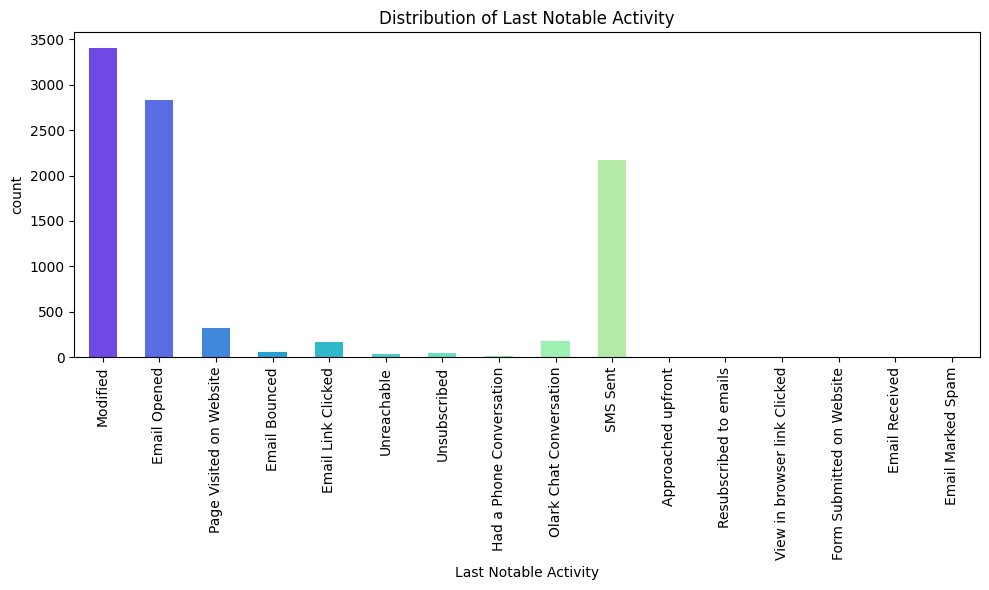

In [18]:
 #Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
#remove first two columns from list
categorical_cols = categorical_cols[2:]
# Create bar plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df,palette='rainbow',width=0.5)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)  # Rotate x-axis labels
    plt.tight_layout()
    plt.show()


# From bar plots we can see 3 data issues

*  Following  columns:**Specialization**,**How did you hear about X Education**,**Lead Profile** and **City**, have a value called select. Converted these values as nan since the customer has not selected any options for these columns while entering the data. List item

*   For Lead source values Google is in both upper and lower cases , updating lowercase google to uppercase.

*   Following colums have only 'NO' value , we can drop following  columns 1) **Magazine** 2) R**eceive More Updates About Our Courses** 3) **Update me on Supply Chain Content** 4) **Get updates on DM Content** 5) **I agree to pay the amount through cheque**


Lets address all above issues.

Replacing all select with Null Values and again checking for Null Count if percentage is greater than 30 we will drop those columns

In [19]:
df.replace('Select', pd.NA, inplace=True)
missing_percentage = df.isnull().sum() / len(df) * 100

# Filter columns with more than 30% missing values
columns_to_drop = missing_percentage[missing_percentage > 30].index
print(columns_to_drop)
df = df.drop(columns=columns_to_drop)
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)
df.head()

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')
Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.00000

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ... X Education Forums  \
0                            0                   0.0  ...                 No   
1                          674                   2.5  ...                 No   
2                         1532                   2.0  ...                 No   
3                          305                   1.0  ...                 No   
4                         1428                   1.0  ...                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   
2        No                    No                      No   
3        No                    No                      No   
4        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 27 columns]

we had dropped below columns as percentage of null count is greater than 30 % 'Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'

#Following columns have null values : Country , Lead Source , Total Visits , Page Views Per Visit , Last Activity,What is your current occupation ,What matters most to you in choosing a course

we need to check values of each column to decide how to impute those values

In [20]:

df['Lead Source'].value_counts()


Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

for Lead source values Google is in both cases , updating lowercase google to uppercase

In [21]:
# replace google with Google
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')
df['Lead Source'].value_counts()


Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

"Google" has the major chunk of data, we can impute the null values with Google

In [22]:
df['Lead Source'] = df['Lead Source'].fillna('Google')
df['Lead Source'].value_counts()

Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [23]:
df['Country'].value_counts()


Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia                   1
Kenya                      1
Sri Lanka                  1
Indonesia                  1
Name: count, dtype: int64

In [24]:
df['Country'] = df['Country'].fillna('India')
df['Country'].value_counts()


Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia                   1
Kenya                      1
Sri Lanka                  1
Indonesia                  1
Name: count, dtype: int64

In [25]:
 #Check the value counts for the column Total Visits

df['TotalVisits'].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [26]:
# Check the median of column

df['TotalVisits'].median()
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())

In [27]:
# Check the value counts for Page Views Per Visit
df['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

In [28]:
# Check the median of the column

df['Page Views Per Visit'].median()

2.0

In [29]:
# We shall impute the null values in 'Page Views Per Visit' by the median value which is 2.0
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())


In [30]:
# Check the value counts for the column Last Activity

df['Last Activity'].value_counts()
df['Last Activity'] = df['Last Activity'].fillna('Email Opened')


In [31]:
# Check the value counts for the column "What is your current Occupation"

df['What is your current occupation'].value_counts()
df['What is your current occupation'] = df['What is your current occupation'].fillna('Unemployed')

In [32]:
# Check the value counts for the column What matters most to you in choosing a course

df['What matters most to you in choosing a course'].value_counts()
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('Better Career Prospects')


In [33]:
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Content                0
Get updates on DM Content                        0
I agree to pay the amount through cheque         0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

From barplot we had observed that following colums have only 'NO' value , we can drop those columns
 1) Magazine
 2) Receive More Updates About Our
  Courses
 3) Update me on Supply Chain Content
 4) Get updates on DM Content
 5) I agree to pay the amount through cheque

In [34]:
df = df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [35]:
df.shape

(9240, 22)

#check for outliers

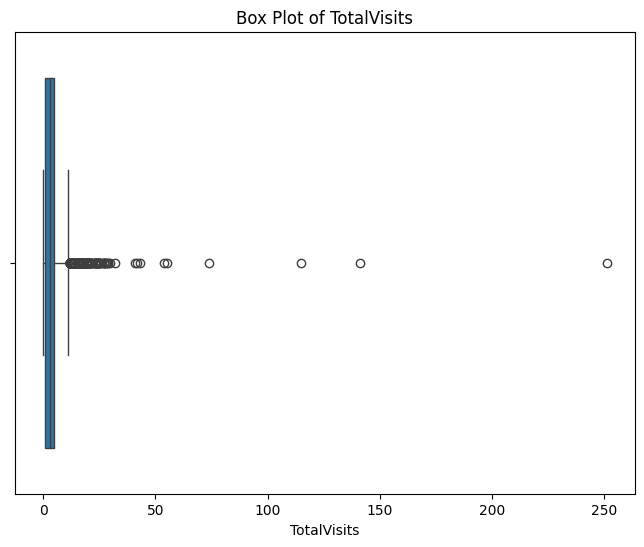

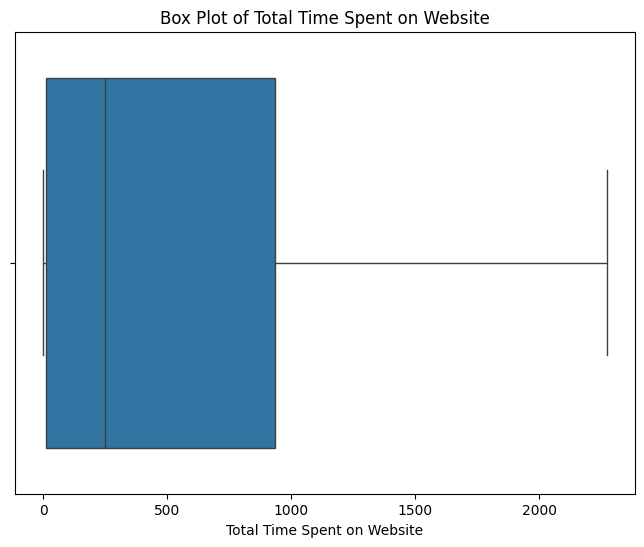

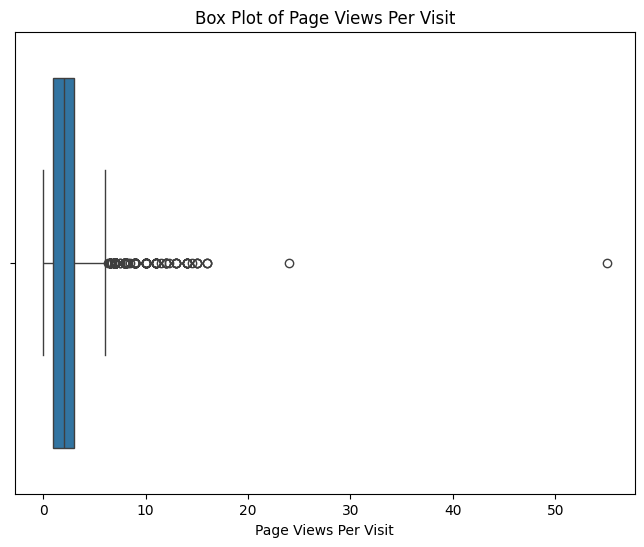

In [36]:
# Select numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=['number']).columns
#Remove Lead Number and Converted from list
numerical_cols = numerical_cols[2:]
# Create box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

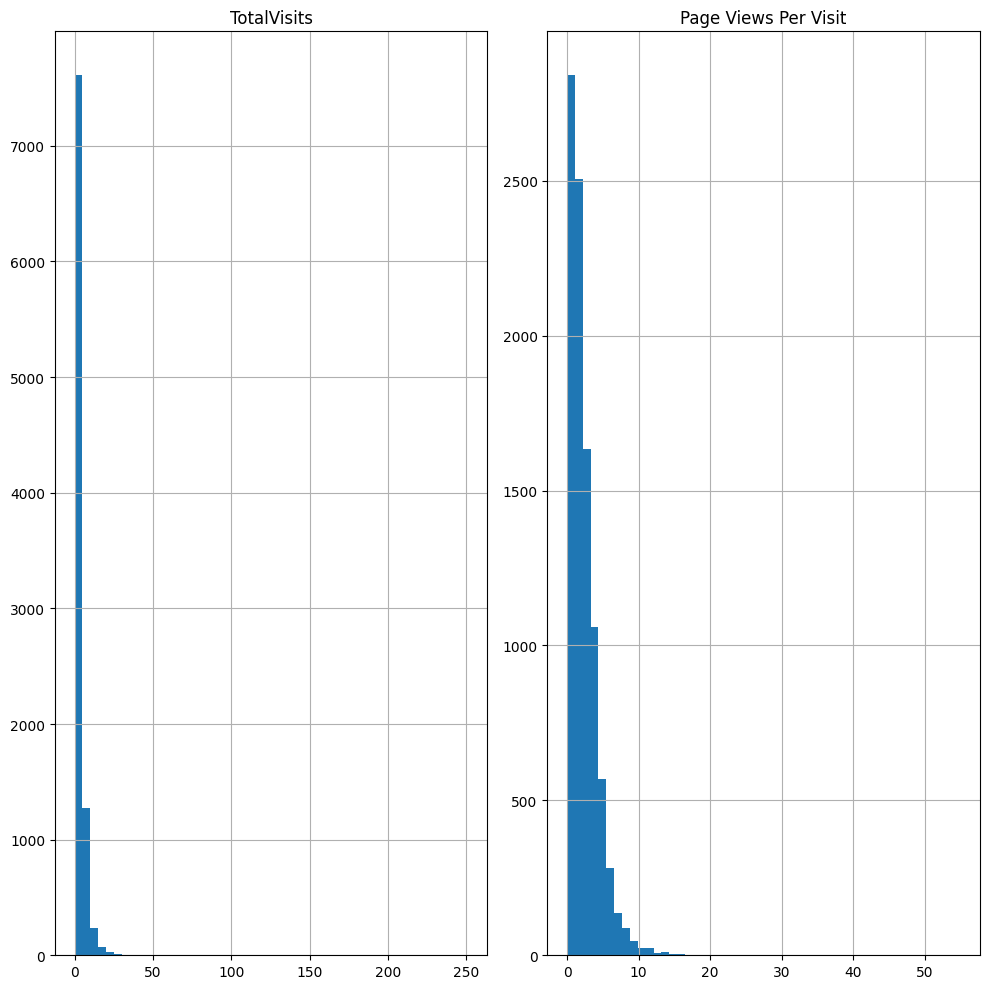

In [37]:
#histogram
df[['TotalVisits','Page Views Per Visit']].hist(figsize=(10, 10),bins=50)
plt.tight_layout()
plt.show()

From Above Histogram analyis it is found that data for variables 'TotalVisits','Page Views Per Visit' is highly skewed ,so we will be adopting 1.5 IQR method to remove outliers instead of using standard deviation

In [38]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

Remove outlier from TotalVisits

In [39]:
outliers = detect_outliers_iqr(df['TotalVisits'])
print(outliers)
df = df[~df['TotalVisits'].isin(outliers)]

print("Shape of DataFrame after removing outliers:", df.shape)



56      13.0
58      17.0
102     12.0
125     16.0
168     12.0
        ... 
9016    25.0
9132    17.0
9138    14.0
9229    13.0
9233    13.0
Name: TotalVisits, Length: 267, dtype: float64
Shape of DataFrame after removing outliers: (8973, 22)


<Axes: xlabel='TotalVisits'>

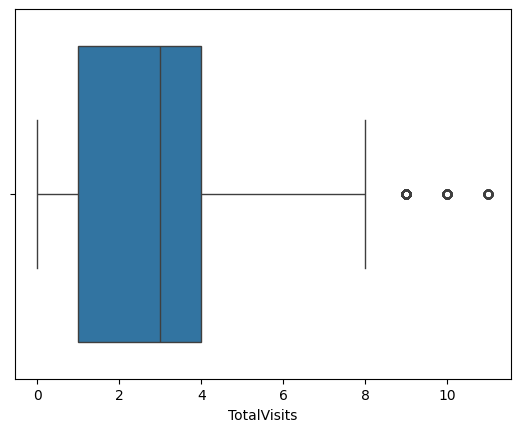

In [40]:
sns.boxplot(x=df['TotalVisits'])


Remove outlier from Page Views Per Visit'

In [41]:
outliers = detect_outliers_iqr(df['Page Views Per Visit'])
print(outliers)
df = df[~df['Page Views Per Visit'].isin(outliers)]

print("Shape of DataFrame after removing outliers:", df.shape)


10       8.0
12      11.0
41       7.0
57       8.0
172      7.0
        ... 
9112     9.0
9129     9.0
9151     7.0
9215     8.0
9223     7.0
Name: Page Views Per Visit, Length: 294, dtype: float64
Shape of DataFrame after removing outliers: (8679, 22)


In [42]:
num_data = round(100*(len(df)/9240),2)
print(num_data)

93.93


After data cleaning and resolving all data issues, finally 93.93 % of intial data i.e, 8679 number of valid leads are remaing for modeling.

# Data Analyis
Let us perform data analyis of cleared dataframe considering : converted as aour target variable.
To explore its relationship with other features and gain insights into the factors that might influence conversion.

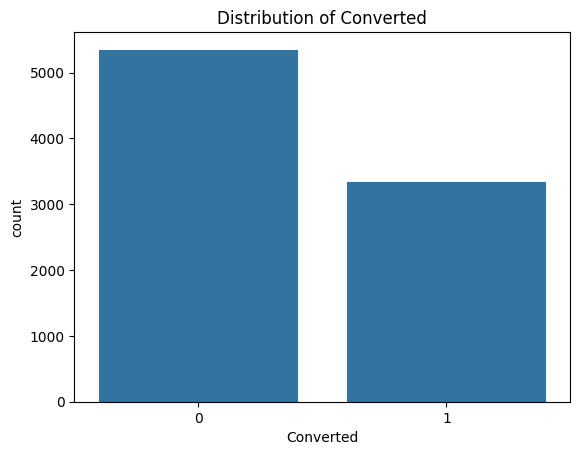

Converted
0    61.60848
1    38.39152
Name: proportion, dtype: float64


In [43]:
# Check the distribution of the target variable
df['Converted'].value_counts()

# Visualize the distribution using a bar plot
sns.countplot(x='Converted', data=df)
plt.title('Distribution of Converted')
plt.show()
# find percentage of converted and non converted
print(df['Converted'].value_counts(normalize=True)*100)


From the above graph , conversion rate is 38.39 %

# Bivariate Analyis of Numerical Features

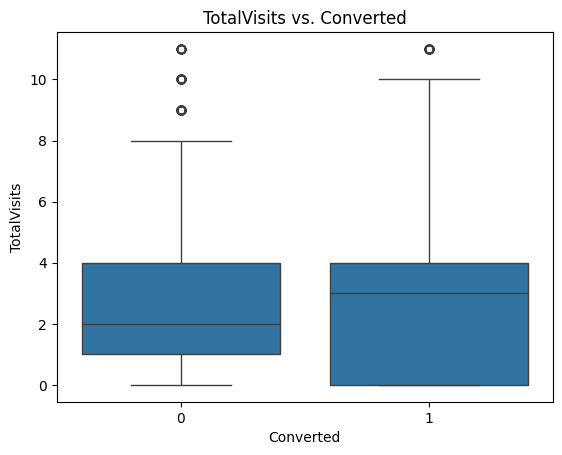

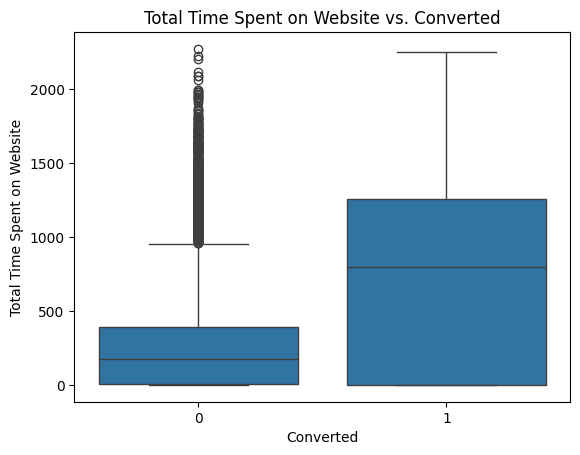

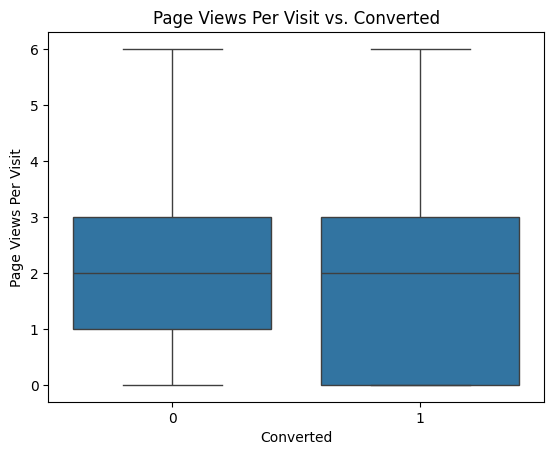

In [44]:
# Create box plots for numerical features grouped by the target variable
for col in df.select_dtypes(include=['number']).columns[2:]:
    sns.boxplot(x='Converted', y=col, data=df)
    plt.title(f'{col} vs. Converted')
    plt.show()

From Above Analysis, it is evident that  the conversion rate were high for  More Total Visits, Higher Total Time Spent on Website .on the other hand Page view per Visit are on average approx equal for converted and non converted cases.




Analyis of Categorical Features vs 'Converted'

<Figure size 1500x600 with 0 Axes>

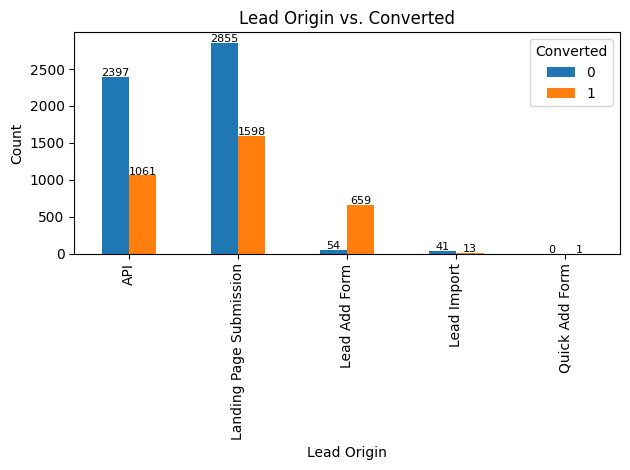

<Figure size 1500x600 with 0 Axes>

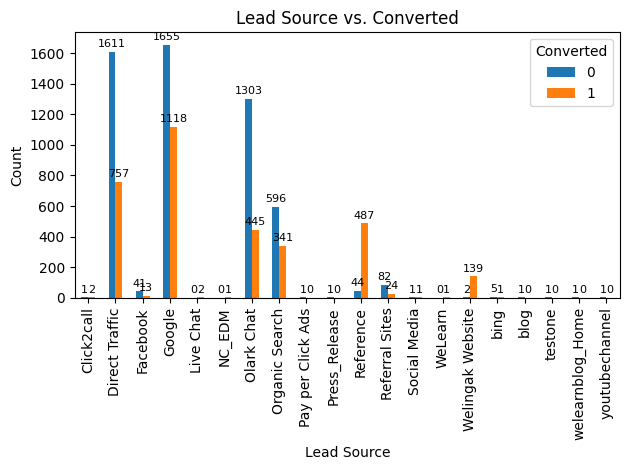

<Figure size 1500x600 with 0 Axes>

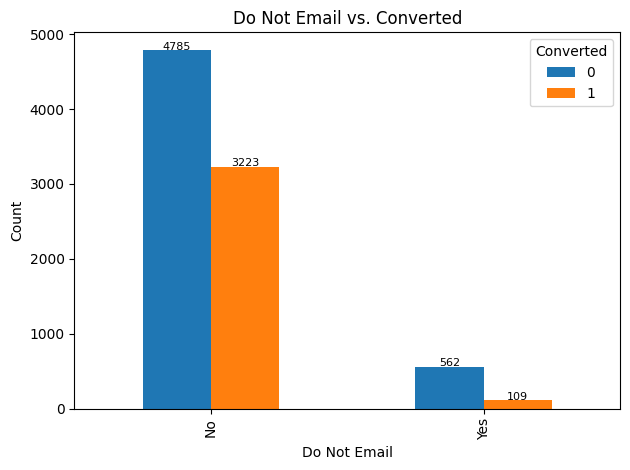

<Figure size 1500x600 with 0 Axes>

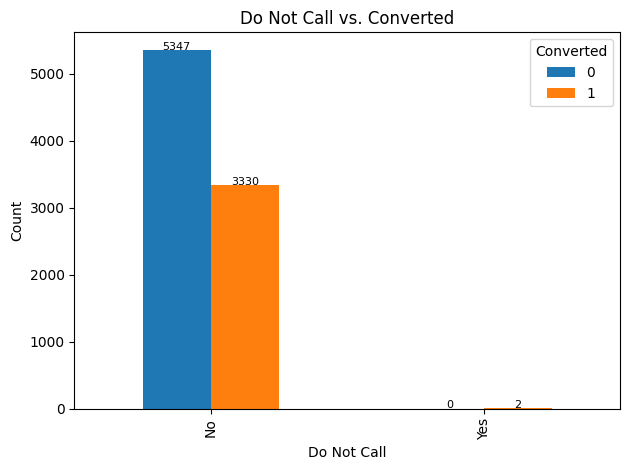

<Figure size 1500x600 with 0 Axes>

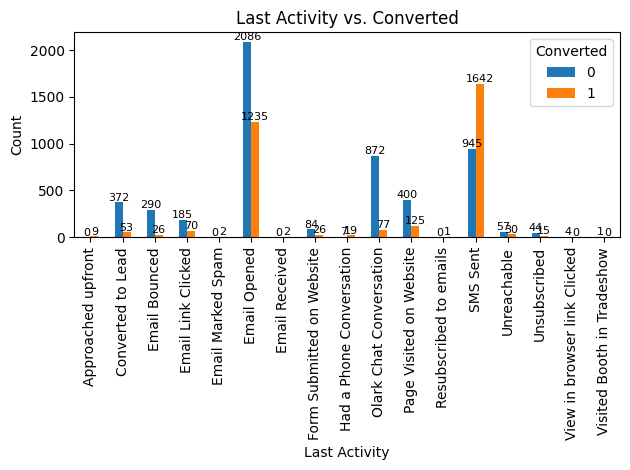

<Figure size 1500x600 with 0 Axes>

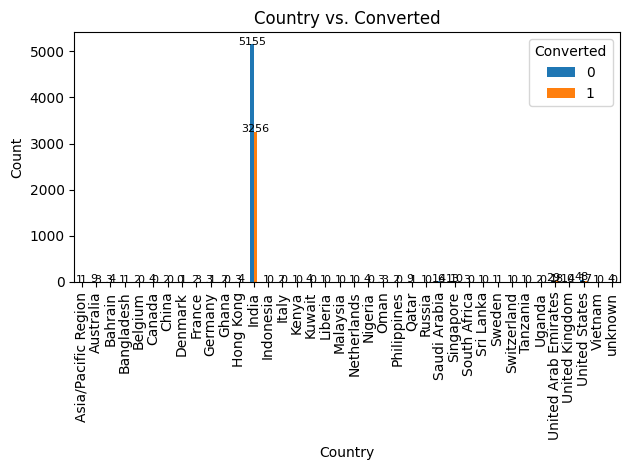

<Figure size 1500x600 with 0 Axes>

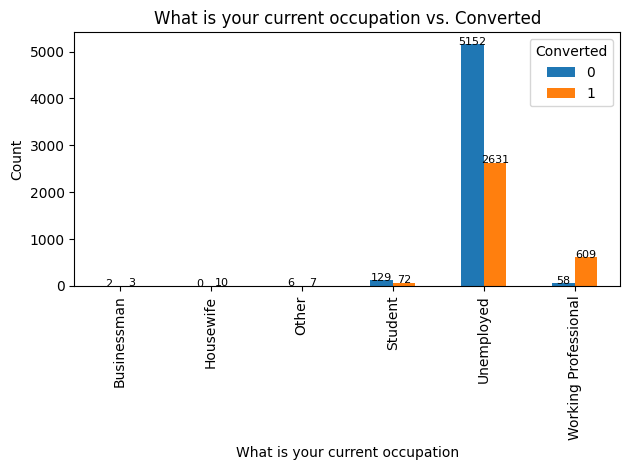

<Figure size 1500x600 with 0 Axes>

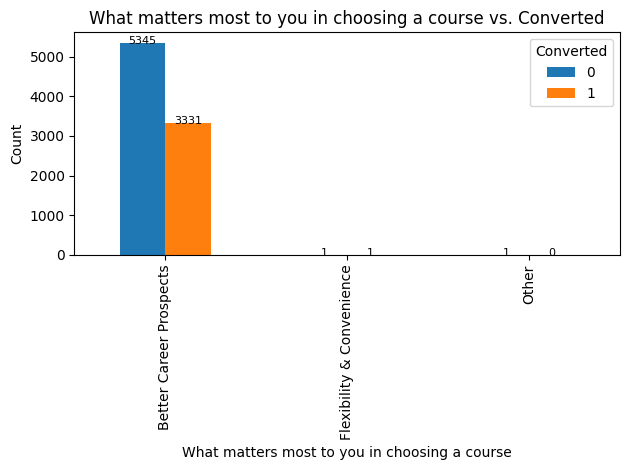

<Figure size 1500x600 with 0 Axes>

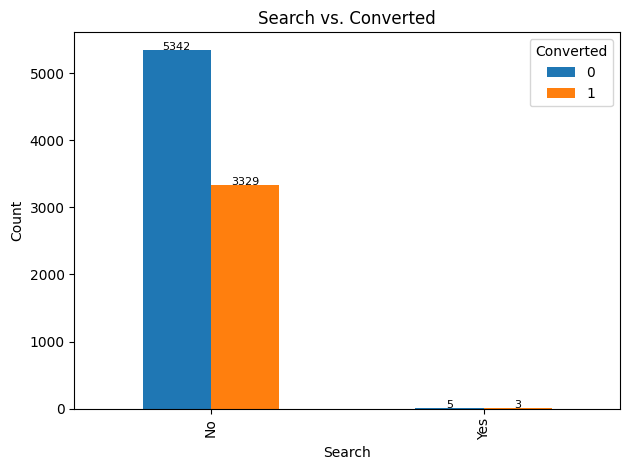

<Figure size 1500x600 with 0 Axes>

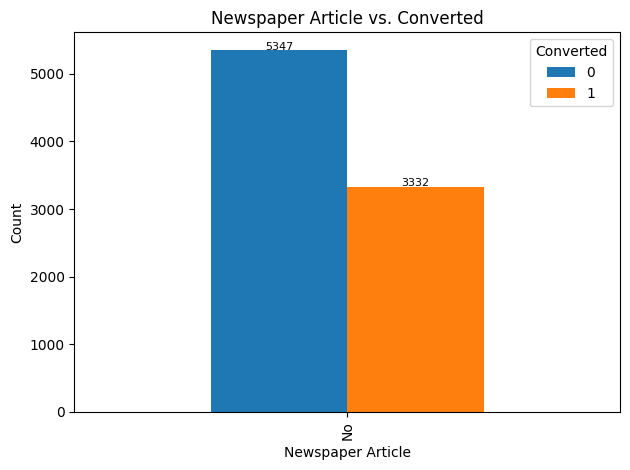

<Figure size 1500x600 with 0 Axes>

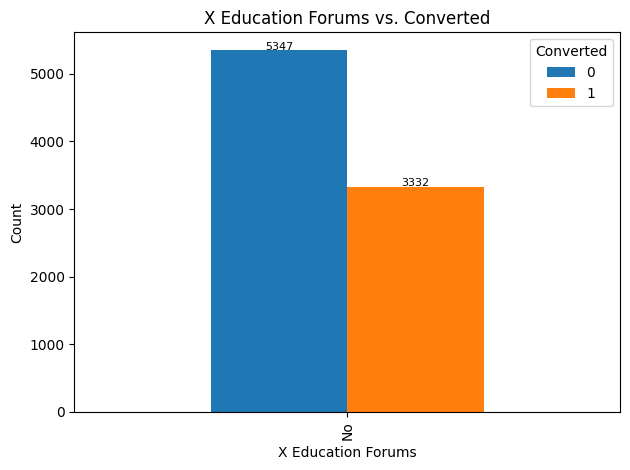

<Figure size 1500x600 with 0 Axes>

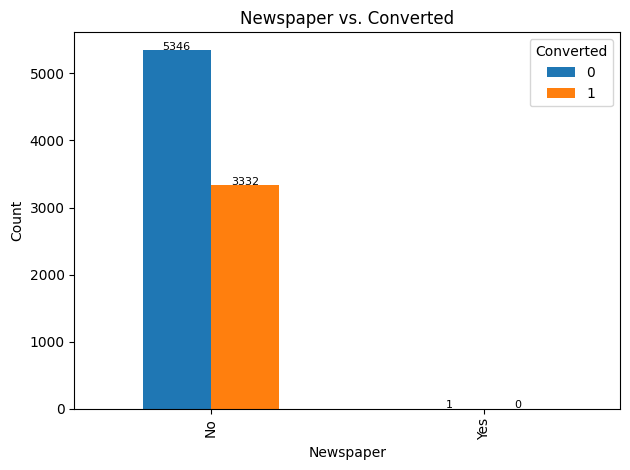

<Figure size 1500x600 with 0 Axes>

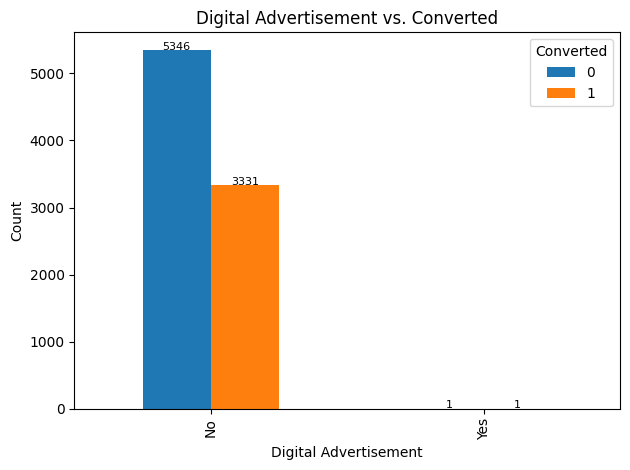

<Figure size 1500x600 with 0 Axes>

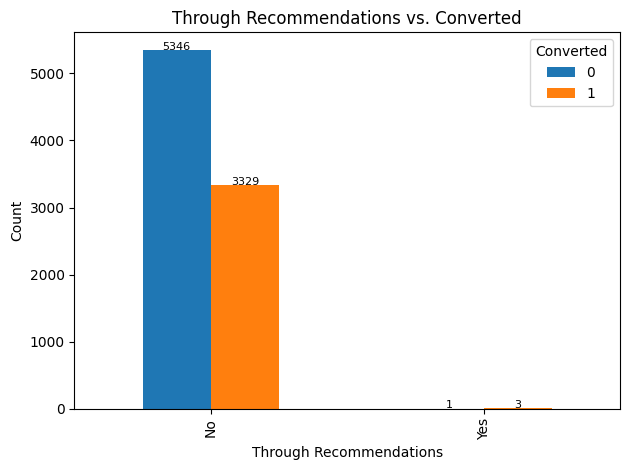

<Figure size 1500x600 with 0 Axes>

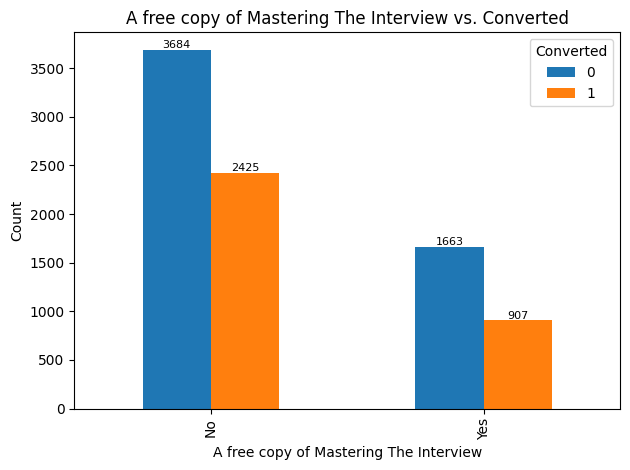

<Figure size 1500x600 with 0 Axes>

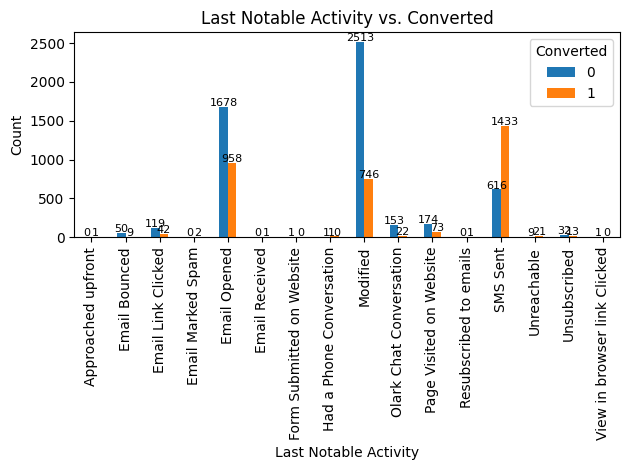

In [45]:
# Create stacked bar plots for categorical features grouped by the target variable
for col in df.select_dtypes(include=['object']).columns[1:]:
    # Create a cross-tabulation table
    ct = pd.crosstab(df[col], df['Converted'])

    # Plot the grouped bar plot using Seaborn
    plt.figure(figsize=(15, 6))  # Adjust figure size as needed
    ax = ct.plot(kind='bar', stacked=False) # Set stacked=False to split into groups

    # Add count labels to each bar
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height}', (x + width/2, y + height+50), ha='center', va='center',fontsize=8)

    plt.title(f'{col} vs. Converted')
    plt.xticks(rotation=90)  # Rotate x-axis labels if needed
    plt.ylabel('Count') #Change y label to proportion as data is normalised
    plt.legend(title='Converted', loc='upper right') # Adjust legend position as per your need
    plt.tight_layout()
    plt.show()

# Analysis of Above Bivarite for Categorical features

Lead Origin Vs Converted
  - From the above graph, it can be seen that the maximum conversion happened
   from Landing Page Submission

Lead Source Vs Converted
  - From the above graph, it can be seen that maximum conversion in the lead
  source is from google

Do Not email Vs Converted
  - From the above graph , it can be seen that maximum coversion is seen in cas where email is sent

Do not call Vs Converetd
 - From the above graph , it can be ssen the major conversion happened when calls were made

Last Activity Vs Converted
 - from the above graph, it can be ssen the major conversion happened for value of 'SMS Sent'

Country Vs Converted
 - from The above graph , maximum conversion is for India. However it is seen that almost all cases belongs to single country India and therefore we will drop tis feature in subsequent step.

What is your Current Occupation  Vs Converted
 - Bivariate Analysis shows  maximum conversion number for Unemployed  category .It is  also seen that 100 % conversion happened for housewifes(All 10 Cases converted).

What Matters to you in choosing the course  Vs Converted
 - Bivariate analysis shows that maximum conversion happened for Better Career Prospects , However almost all cases belongs to category of "better Career prospects'. Therefore this feature have near zero entropy ,so we will drop it in subsequent step.

Search Vs Converted
  - From The above graph , maximum leads converted who are not through search.

Newspaper Article vs Converted
  - From the above Bivariate analyis , it is evident "Newspaper Article" column  has only one value for all rows "No" , so we will drop this column in subsequent step.

X Education Forums Vs Converted
 -  From the above Bivariate analyis , it is evident "X Education Forums" column  has only one value for all rows "No" , so we will drop this column in subsequent step.

 Newspaper Vs Converted
 - From above graph , Newspaper column has only one row with "Yes"  and further  this lead did not get converted and rest of all the rows  are "No",  so we will drop this column in subsequent step.

Digital Advertisement Vs Converted
 - From the above analysis, it is clearly seen almost all leads  belong to Non digital advertisement category and therefore shows more conversion , however it is interesting to note that out of 2 leads belonging to digital advertisement category 1 is converted(50 % conversion rate which is higher than for the case of non digital advertisement).

Through Recommendations Vs Converted
 - From the above analysis, it is clearly seen almost all leads belong to Non recommended category and therefore shows more conversion , however it is interesting to note that conversion rate is significanly high (75%) for the leads came throgh recommendations.

Mastering Interview Copy vs Converted
 - from the above analysis , Conversion rate is high for leads who do not opted a free copy of Mastering Interviews.

Last Notable Activity Vs Converted
 - From the Graph , it is evident that converison is high forfor "SMS Sent".




  




  

In [46]:

df = df.drop(['Country', 'What matters most to you in choosing a course', 'Newspaper Article',
                          'X Education Forums', ], axis=1)


#Data preparation
 - generating dummy features


In [47]:
#let us list binary categorical feature for which dummy varaible will be created
all_columns = df.columns.tolist()
all_columns.remove('Converted')

# Filter for columns with only two unique values
binary_features_list = [col for col in all_columns if len(df[col].unique()) == 2]

print(binary_features_list)
df[binary_features_list]

['Do Not Email', 'Do Not Call', 'Search', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


Do Not Email Do Not Call Search Newspaper Digital Advertisement  \
0              No          No     No        No                    No   
1              No          No     No        No                    No   
2              No          No     No        No                    No   
3              No          No     No        No                    No   
4              No          No     No        No                    No   
...           ...         ...    ...       ...                   ...   
9235          Yes          No     No        No                    No   
9236           No          No     No        No                    No   
9237          Yes          No     No        No                    No   
9238           No          No     No        No                    No   
9239           No          No     No        No                    No   

     Through Recommendations A free copy of Mastering The Interview  
0                         No                                     No  
1                         No                                     No  
2                         No                                    Yes  
3                         No                                     No  
4                         No                                     No  
...                      ...                                    ...  
9235                      No                                     No  
9236                      No                                    Yes  
9237                      No                                    Yes  
9238                      No                                     No  
9239                      No                                    Yes  

[8679 rows x 7 columns]

In [48]:
#Binary fetaures listed in variable 'binary_features_list' evaluated in previous
# cell has entries yes or No so we will map them to 1,0 before model development
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
df[binary_features_list] = df[binary_features_list].apply(binary_map)

In [49]:
# List of categorical features to create dummies for
categorical_features = ['Lead Origin', 'Lead Source', 'Last Activity',
                        'What is your current occupation', 'Last Notable Activity']

# Create dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_features,
                            prefix=categorical_features, drop_first=True)

In [50]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8679 entries, 0 to 9239
Data columns (total 72 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           8679 non-null   object 
 1   Lead Number                                           8679 non-null   int64  
 2   Do Not Email                                          8679 non-null   int64  
 3   Do Not Call                                           8679 non-null   int64  
 4   Converted                                             8679 non-null   int64  
 5   TotalVisits                                           8679 non-null   float64
 6   Total Time Spent on Website                           8679 non-null   int64  
 7   Page Views Per Visit                                  8679 non-null   float64
 8   Search                                                8679 non-

These dummy variables have very few real relevant cases Lead Origin_Quick Add Form,Lead Source_NC_EDM ,Last Activity_Resubscribed to emails,Current Occupation_Businessman,Last NotableActivity_Resubscribed to emails
Therefore we can drop them

In [51]:
#drop Lead Origin_Quick Add Form,Lead Source_NC_EDM ,Last Activity_Resubscribed to emails,Current Occupation_Businessman,Last NotableActivity_Resubscribed to emails
columns_to_drop = ['Lead Origin_Quick Add Form', 'Lead Source_NC_EDM',
                   'Last Activity_Resubscribed to emails', 'What is your current occupation_Unemployed',
                   'Last Notable Activity_Resubscribed to emails']

 #Drop the columns
df_encoded = df_encoded.drop(columns_to_drop, axis=1)



In [52]:
#dropping Prospect ID and lead Number as they are not valid features for modelling
df_encoded = df_encoded.drop(['Prospect ID', 'Lead Number'], axis=1)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8679 entries, 0 to 9239
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8679 non-null   int64  
 1   Do Not Call                                           8679 non-null   int64  
 2   Converted                                             8679 non-null   int64  
 3   TotalVisits                                           8679 non-null   float64
 4   Total Time Spent on Website                           8679 non-null   int64  
 5   Page Views Per Visit                                  8679 non-null   float64
 6   Search                                                8679 non-null   int64  
 7   Newspaper                                             8679 non-null   int64  
 8   Digital Advertisement                                 8679 non-

In [53]:
# we have to create logitic regression which takes numeric inputs, so converting boolean dtype to uint 8
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(np.uint8)



In [54]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8679 entries, 0 to 9239
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8679 non-null   int64  
 1   Do Not Call                                           8679 non-null   int64  
 2   Converted                                             8679 non-null   int64  
 3   TotalVisits                                           8679 non-null   float64
 4   Total Time Spent on Website                           8679 non-null   int64  
 5   Page Views Per Visit                                  8679 non-null   float64
 6   Search                                                8679 non-null   int64  
 7   Newspaper                                             8679 non-null   int64  
 8   Digital Advertisement                                 8679 non-

In [55]:
pd.options.display.max_rows = None
percent_missing = round(100*(df_encoded.isnull().sum()/len(df_encoded.index)), 2)
percent_missing

Do Not Email                                            0.0
Do Not Call                                             0.0
Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
Search                                                  0.0
Newspaper                                               0.0
Digital Advertisement                                   0.0
Through Recommendations                                 0.0
A free copy of Mastering The Interview                  0.0
Lead Origin_Landing Page Submission                     0.0
Lead Origin_Lead Add Form                               0.0
Lead Origin_Lead Import                                 0.0
Lead Source_Direct Traffic                              0.0
Lead Source_Facebook                                    0.0
Lead Source_Google                                      0.0
Lead Source_Live Chat                                   0.0
Lead Source_Olark Chat                                  0.0
Lead Source_Organic Search                              0.0
Lead Source_Pay per Click Ads                           0.0
Lead Source_Press_Release                               0.0
Lead Source_Reference                                   0.0
Lead Source_Referral Sites                              0.0
Lead Source_Social Media                                0.0
Lead Source_WeLearn                                     0.0
Lead Source_Welingak Website                            0.0
Lead Source_bing                                        0.0
Lead Source_blog                                        0.0
Lead Source_testone                                     0.0
Lead Source_welearnblog_Home                            0.0
Lead Source_youtubechannel                              0.0
Last Activity_Converted to Lead                         0.0
Last Activity_Email Bounced                             0.0
Last Activity_Email Link Clicked                        0.0
Last Activity_Email Marked Spam                         0.0
Last Activity_Email Opened                              0.0
Last Activity_Email Received                            0.0
Last Activity_Form Submitted on Website                 0.0
Last Activity_Had a Phone Conversation                  0.0
Last Activity_Olark Chat Conversation                   0.0
Last Activity_Page Visited on Website                   0.0
Last Activity_SMS Sent                                  0.0
Last Activity_Unreachable                               0.0
Last Activity_Unsubscribed                              0.0
Last Activity_View in browser link Clicked              0.0
Last Activity_Visited Booth in Tradeshow                0.0
What is your current occupation_Housewife               0.0
What is your current occupation_Other                   0.0
What is your current occupation_Student                 0.0
What is your current occupation_Working Professional    0.0
Last Notable Activity_Email Bounced                     0.0
Last Notable Activity_Email Link Clicked                0.0
Last Notable Activity_Email Marked Spam                 0.0
Last Notable Activity_Email Opened                      0.0
Last Notable Activity_Email Received                    0.0
Last Notable Activity_Form Submitted on Website         0.0
Last Notable Activity_Had a Phone Conversation          0.0
Last Notable Activity_Modified                          0.0
Last Notable Activity_Olark Chat Conversation           0.0
Last Notable Activity_Page Visited on Website           0.0
Last Notable Activity_SMS Sent                          0.0
Last Notable Activity_Unreachable                       0.0
Last Notable Activity_Unsubscribed                      0.0
Last Notable Activity_View in browser link Clicked      0.0
dtype: float64

#Test-Train Split

Let us split cleaned and encoded data into test and training data sets


In [56]:
# Assuming 'Converted' is target variable

X = df_encoded.drop('Converted', axis=1)  # Features
y = df_encoded['Converted']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [57]:
print("shape of training data -->",X_train.shape)
print("shape of testing data -->",X_test.shape)

shape of training data --> (6075, 64)
shape of testing data --> (2604, 64)


Rescaling the features with StandardScaler Scaling


In [58]:

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])
X_train.head()
X_test.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3423             0            0    -1.148147                    -0.867739   
7935             1            0    -0.332717                     0.861600   
3009             0            0    -0.332717                    -0.128721   
7432             0            0    -0.332717                     1.509404   
5038             0            0     2.929004                     1.563388   

      Page Views Per Visit  Search  Newspaper  Digital Advertisement  \
3423             -1.242664       0          0                      0   
7935             -0.051108       0          0                      0   
3009             -0.051108       0          0                      0   
7432             -0.051108       0          0                      0   
5038              0.246781       0          0                      0   

      Through Recommendations  A free copy of Mastering The Interview  ...  \
3423                        0                                       0  ...   
7935                        0                                       1  ...   
3009                        0                                       1  ...   
7432                        0                                       0  ...   
5038                        0                                       1  ...   

      Last Notable Activity_Email Received  \
3423                                     0   
7935                                     0   
3009                                     0   
7432                                     0   
5038                                     0   

      Last Notable Activity_Form Submitted on Website  \
3423                                                0   
7935                                                0   
3009                                                0   
7432                                                0   
5038                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3423                                               0   
7935                                               0   
3009                                               0   
7432                                               0   
5038                                               0   

      Last Notable Activity_Modified  \
3423                               1   
7935                               1   
3009                               0   
7432                               0   
5038                               0   

      Last Notable Activity_Olark Chat Conversation  \
3423                                              0   
7935                                              0   
3009                                              0   
7432                                              0   
5038                                              0   

      Last Notable Activity_Page Visited on Website  \
3423                                              0   
7935                                              0   
3009                                              0   
7432                                              0   
5038                                              1   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3423                               0                                  0   
7935                               0                                  0   
3009                               0                                  0   
7432                               1                                  0   
5038                               0                                  0   

      Last Notable Activity_Unsubscribed  \
3423                                   0   
7935                                   0   
3009                                   0   
7432                                   0   
5038                                   0   

      Last Notable Activity_View in browser link Clicked  
3423  

In [59]:
### Checking the Conversion Rate percentage

converted = (sum(df_encoded['Converted'])/len(df_encoded['Converted'].index))*100
converted

38.391519760341055

we have 38 % conversion rate

Looking at Correlations

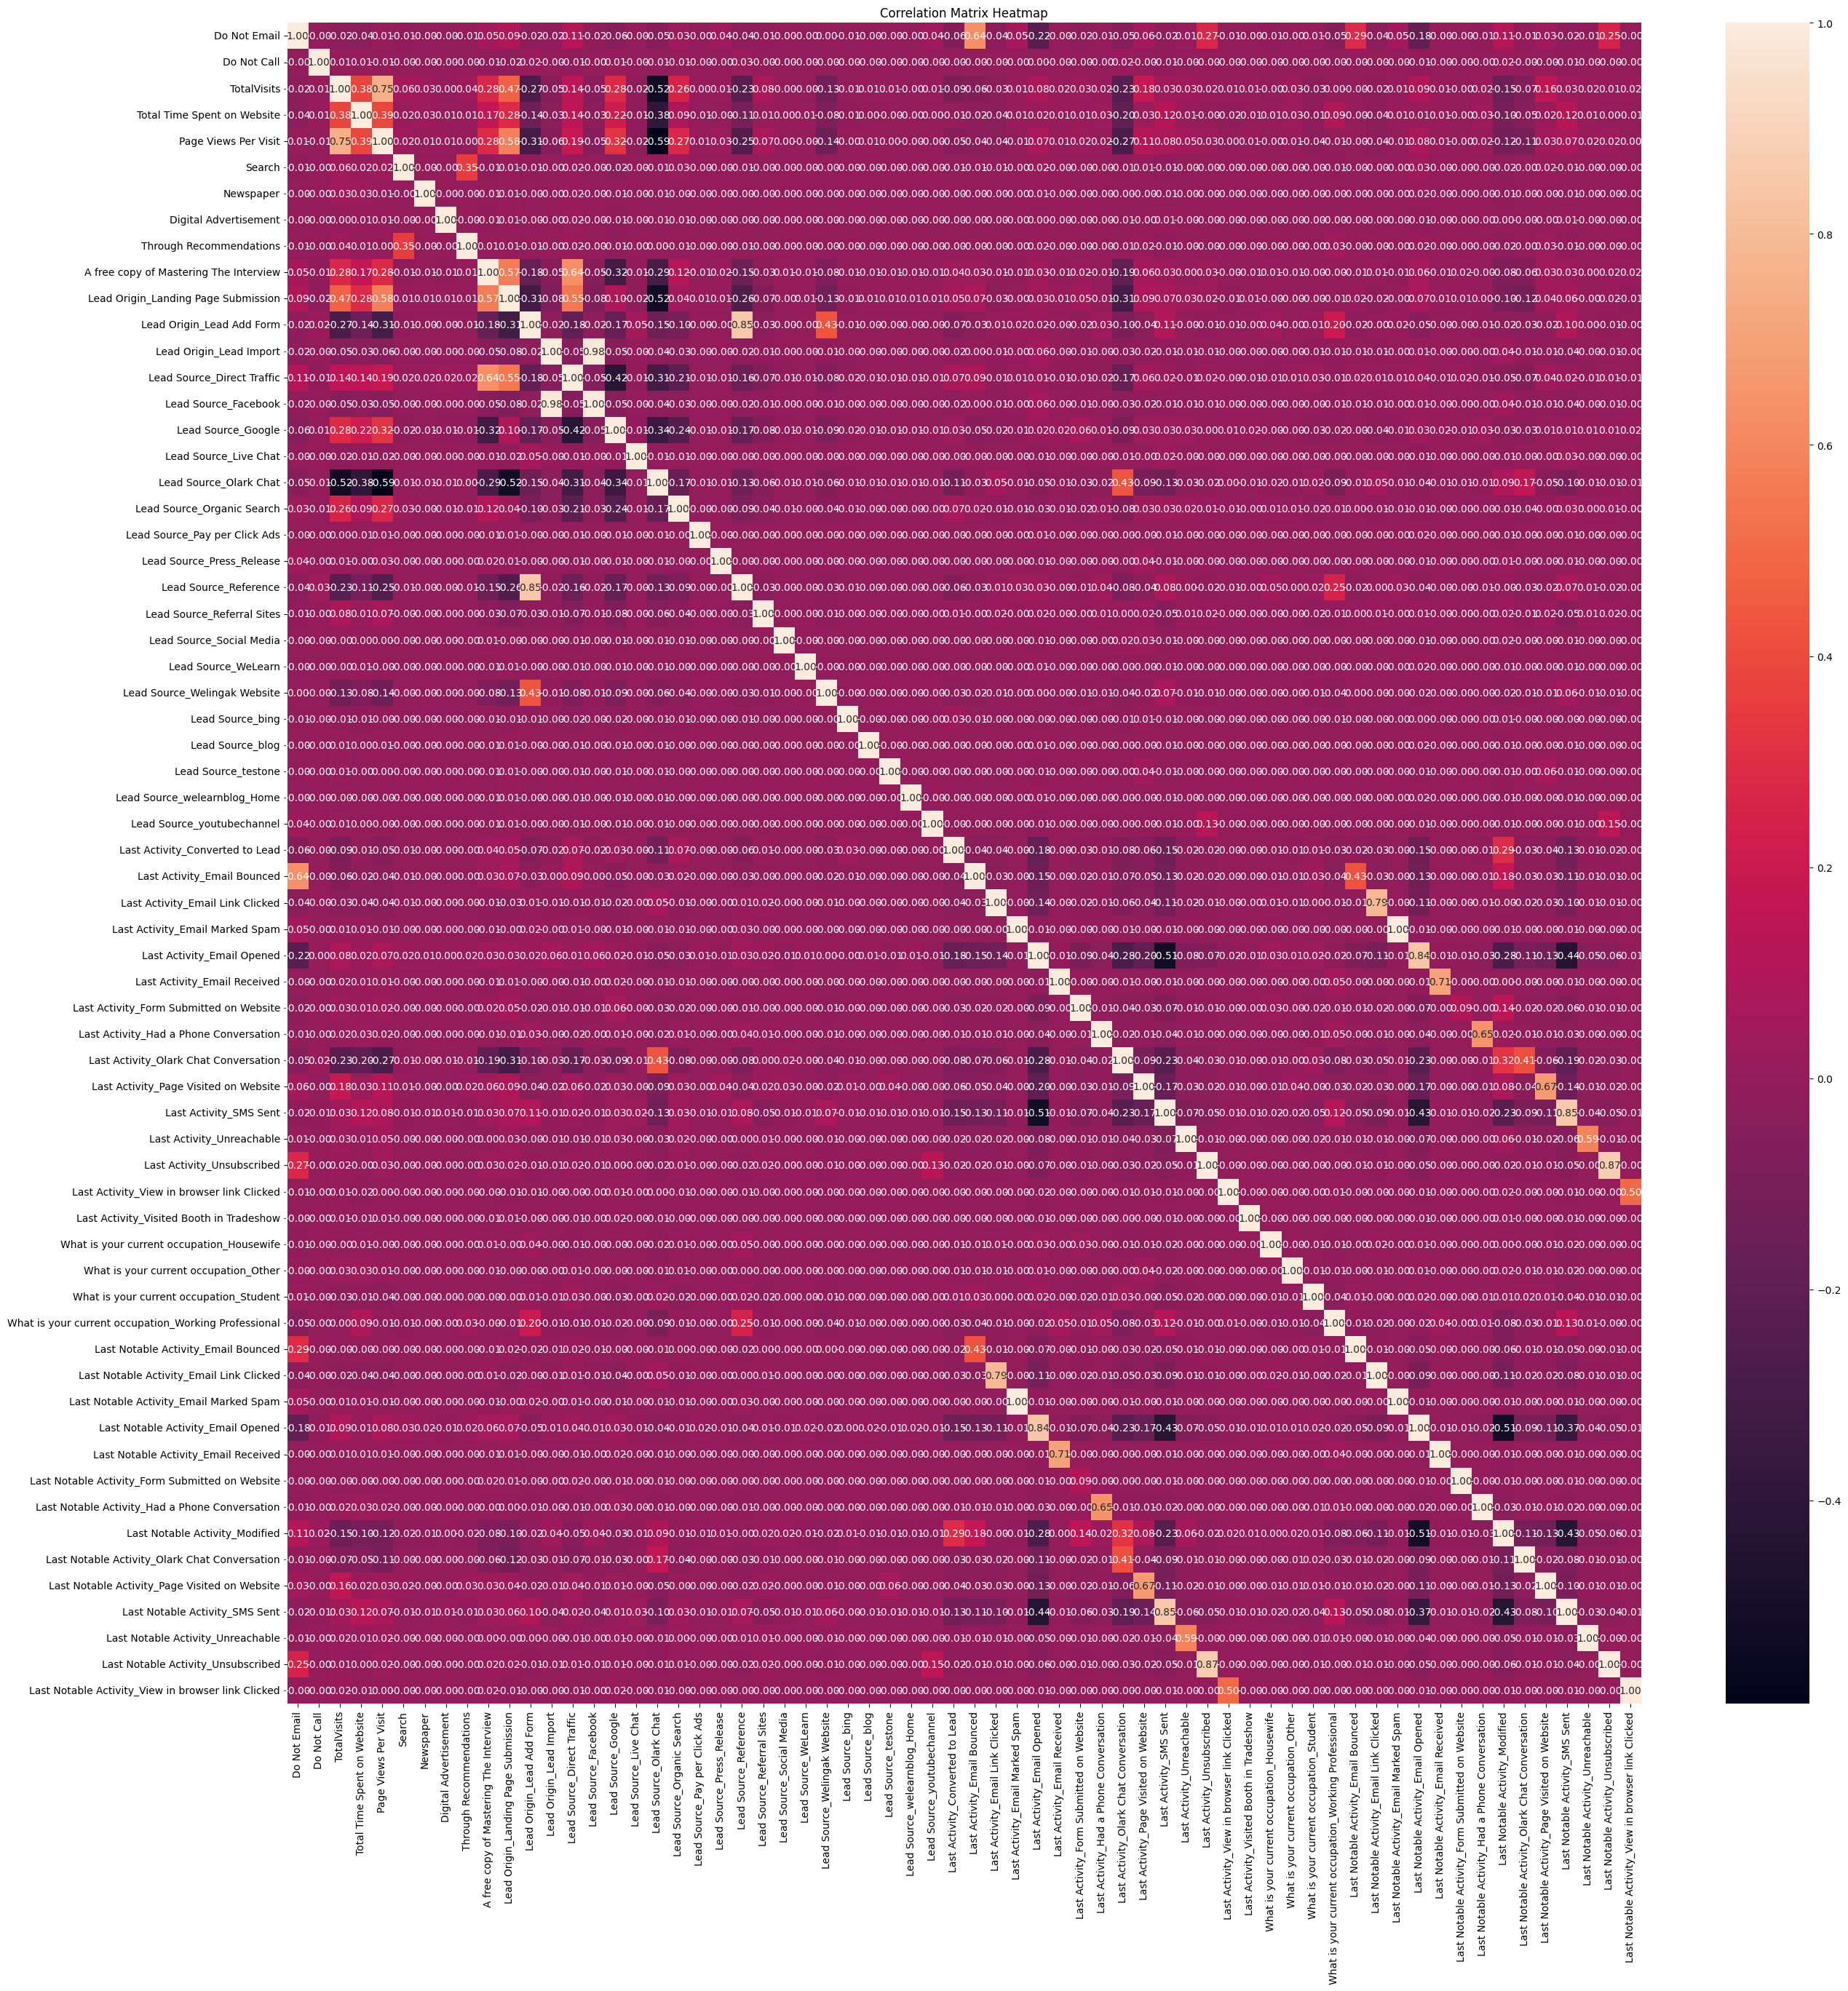

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))  # Adjust figure size as needed
sns.heatmap(X.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()



# Below  variables  have high correlation with each other having value 1 and 0.9. So  we can drop any of them
(Last Activity_Unsubscribed,Last Notable Activity_Unsubscibed)
(Last Activity_SMS Sent,Last Notable Activity_SMS Sent)
(Last Notable Activity_Email Marked Spam,Last Activity_Email Marked Spam)

In [61]:
X_train = X_train.drop(['Last Activity_Unsubscribed', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Email Marked Spam'], axis=1)

X_test = X_test.drop(['Last Activity_Unsubscribed', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Email Marked Spam'], axis=1)

# Model Building

Building Initial Model


In [62]:
import statsmodels.api as sm


In [63]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6017
Model Family:                Binomial   Df Model:                           57
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 17 Mar 2025   Deviance:                   1.4359e+05
Time:                        18:52:20   Pearson chi2:                 7.02e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 4.975e+15   4.34e+07   1.15e+08      0.000    4.97e+15    4.97e+15
Do Not Email                                         -7.764e+14   4.58e+06  -1.69e+08      0.000   -7.76e+14   -7.76e+14
Do Not Call                                           3.808e+15   4.76e+07   8.01e+07      0.000    3.81e+15    3.81e+15
TotalVisits                                           2.141e+14   1.42e+06   1.51e+08      0.000    2.14e+14    2.14e+14
Total Time Spent on Website                           4.612e+13   9.86e+05   4.68e+07      0.000    4.61e+13    4.61e+13
Page Views Per Visit                                 -8.186e+13   1.57e+06  -5.22e+07      0.000   -8.19e+13   -8.19e+13
Search                                               -1.045e+15   2.76e+07  -3.79e+07      0.000   -1.05e+15   -1.05e+15
Newspaper                                              -7.3e+15   6.73e+07  -1.08e+08      0.000    -7.3e+15    -7.3e+15
Digital Advertisement                                 2.007e+14   4.76e+07   4.22e+06      0.000    2.01e+14    2.01e+14
Through Recommendations                               5.207e+14   3.64e+07   1.43e+07      0.000    5.21e+14    5.21e+14
A free copy of Mastering The Interview                 6.43e+13   2.77e+06   2.32e+07      0.000    6.43e+13    6.43e+13
Lead Origin_Landing Page Submission                  -1.734e+14   2.83e+06  -6.12e+07      0.000   -1.73e+14   -1.73e+14
Lead Origin_Lead Add Form                             1.028e+15   1.27e+07    8.1e+07      0.000    1.03e+15    1.03e+15
Lead Origin_Lead Import                               1.961e+15   6.86e+07   2.86e+07      0.000    1.96e+15    1.96e+15
Lead Source_Direct Traffic                           -4.287e+15   3.98e+07  -1.08e+08      0.000   -4.29e+15   -4.29e+15
Lead Source_Facebook                                 -5.904e+15   7.83e+07  -7.54e+07      0.000    -5.9e+15    -5.9e+15
Lead Source_Google                                   -4.126e+15   3.97e+07  -1.04e+08      0.000   -4.13e+15   -4.13e+15
Lead Source_Live Chat                                -1.503e+15   6.15e+07  -2.45e+07      0.000    -1.5e+15    -1.5e+15
Lead Source_Olark Chat                                -3.34e+15   3.99e+07  -8.38e+07      0.000   -3.34e+15   -3.34e+15
Lead Source_Organic Search                            -4.36e+15   3.98e+07   -1.1e+08      0.000   -4.36e+15   -4.36e+15
Lead Source_Pay per Click Ads                            9.4961   8.98e-08   1.06e+08      0.000       9.496       9.496
Lead Source_Press_Release                            -9.762e+15   7.83e+07  -1.25e+08      0.000   -9.76e+15   -9.76e+15
Lead Source_Reference                                -3.94

#Feature Selection Using RFE (Coarse tuning)
#Manual fine-tuning using p-values and VIFs
We will start with 20 features using RFE and then use p values and VIF analysis to see what features can be further dropped to achive stable model. As asked final model must have less or equal to 15 features, in case if all 20 features provide stable model (i.e., p value<0.05 and VIF<5 and model coefficient resonable) then we will repeat RFE with 15 features only.

In [64]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# Get the feature ranking information
feature_ranking = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Print feature ranking in sorted manner
print("Feature Ranking:")
print("-" * 70)  # separator line
print("{:<55} {:<10} {:<10}".format("Feature", "Selected", "Rank"))  # col name
print("-" * 70)
for feature, selected, rank in feature_ranking:
    print("{:<55} {:<10} {:<10}".format(feature, selected, rank))

Feature Ranking:
----------------------------------------------------------------------
Feature                                                 Selected   Rank      
----------------------------------------------------------------------
Do Not Email                                            1          1         
Do Not Call                                             1          1         
TotalVisits                                             0          19        
Total Time Spent on Website                             1          1         
Page Views Per Visit                                    0          18        
Search                                                  0          16        
Newspaper                                               0          3         
Digital Advertisement                                   0          28        
Through Recommendations                                 0          22        
A free copy of Mastering The Interview                  0    

Features selected using RFE

In [65]:
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print("Features Selected by RFE:")
print("-" * 30)  # Print a separator line
for feature in selected_features:
    print(f"- {feature}")

# Create new DataFrames with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Features Selected by RFE:
------------------------------
- Do Not Email
- Do Not Call
- Total Time Spent on Website
- Lead Origin_Lead Add Form
- Lead Source_Olark Chat
- Lead Source_Welingak Website
- Last Activity_Converted to Lead
- Last Activity_Email Bounced
- Last Activity_Had a Phone Conversation
- Last Activity_Olark Chat Conversation
- Last Activity_SMS Sent
- What is your current occupation_Housewife
- What is your current occupation_Working Professional
- Last Notable Activity_Email Link Clicked
- Last Notable Activity_Email Opened
- Last Notable Activity_Had a Phone Conversation
- Last Notable Activity_Modified
- Last Notable Activity_Olark Chat Conversation
- Last Notable Activity_Page Visited on Website
- Last Notable Activity_Unreachable


Features which are not slected using RFE

In [66]:
# columns which are not selected by RFE
not_selected_features = X_train.columns[~rfe.support_]

# Print the features in a formatted way
print("Features Not Selected by RFE:")
print("-" * 30)  # Print a separator line
for feature in not_selected_features:
    print(f"- {feature}")

Features Not Selected by RFE:
------------------------------
- TotalVisits
- Page Views Per Visit
- Search
- Newspaper
- Digital Advertisement
- Through Recommendations
- A free copy of Mastering The Interview
- Lead Origin_Landing Page Submission
- Lead Origin_Lead Import
- Lead Source_Direct Traffic
- Lead Source_Facebook
- Lead Source_Google
- Lead Source_Live Chat
- Lead Source_Organic Search
- Lead Source_Pay per Click Ads
- Lead Source_Press_Release
- Lead Source_Reference
- Lead Source_Referral Sites
- Lead Source_Social Media
- Lead Source_WeLearn
- Lead Source_bing
- Lead Source_blog
- Lead Source_testone
- Lead Source_welearnblog_Home
- Lead Source_youtubechannel
- Last Activity_Email Link Clicked
- Last Activity_Email Marked Spam
- Last Activity_Email Opened
- Last Activity_Email Received
- Last Activity_Form Submitted on Website
- Last Activity_Page Visited on Website
- Last Activity_Unreachable
- Last Activity_View in browser link Clicked
- Last Activity_Visited Booth in T

Refined Model post RFE - Model 2


In [67]:
X_train_selected_sm = sm.add_constant(X_train_selected)
logm2 = sm.GLM(y_train,X_train_selected_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6054
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2445.0
Date:                Mon, 17 Mar 2025   Deviance:                       4890.0
Time:                        18:52:40   Pearson chi2:                 6.54e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.4087
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3480      0.171     -2.034      0.042      -0.683      -0.013
Do Not Email                                            -1.3582      0.204     -6.666      0.000      -1.757      -0.959
Do Not Call                                             25.4987   1.52e+05      0.000      1.000   -2.98e+05    2.98e+05
Total Time Spent on Website                              1.1212      0.042     26.875      0.000       1.039       1.203
Lead Origin_Lead Add Form                                3.9300      0.205     19.159      0.000       3.528       4.332
Lead Source_Olark Chat                                   1.2884      0.107     12.045      0.000       1.079       1.498
Lead Source_Welingak Website                            23.4705   1.98e+04      0.001      0.999   -3.88e+04    3.88e+04
Last Activity_Converted to Lead                         -0.7355      0.220     -3.343      0.001      -1.167      -0.304
Last Activity_Email Bounced                             -0.8375      0.364     -2.299      0.021      -1.552      -0.124
Last Activity_Had a Phone Conversation                   0.0788      0.940      0.084      0.933      -1.763       1.921
Last Activity_Olark Chat Conversation                   -1.3142      0.208     -6.324      0.000      -1.721      -0.907
Last Activity_SMS Sent                                   0.5040      0.157      3.209      0.001       0.196       0.812
What is your current occupation_Housewife               25.9832   7.91e+04      0.000      1.000   -1.55e+05    1.55e+05
What is your current occupation_Working Professional     2.7471      0.189     14.562      0.000       2.377       3.117
Last Notable Activity_Email Link Clicked                -1.5591      0.312     -5.005      0.000      -2.170      -0.949
Last Notable Activity_Email Opened                      -1.0221      0.179     -5.702      0.000      -1.373      -0.671
Last Notable Activity_Had a Phone Conversation          24.6862   5.67e+04      0.000      1.000   -1.11e+05    1.11e+05
Last Notable Activity_Modified                          -1.4136      0.144     -9.802      0.000      -1.696      -1.131
Last Notable Activity_Olark Chat Conversation           -1.8458      0.478     -3.859      0.000      -2.783      -0.908
Last Notable Activity_Page Visited on Website           -1.1339      0.265     -4.281      0.000      -1.653      -0.615
Last Notable Activity_Unreachable                        1.0430      0.571      1.827      0.068      -0.076       2.162
========================================================================================================================
"""

Removing column What is your current occupation_Housewife
 as it has a high pvalue and hence is insignificant

**bold text**

In [68]:
# drop What is your current occupation_Housewife from selected_features
selected_features = selected_features.drop('What is your current occupation_Housewife')

Refined Model - Model 3


In [69]:
# rebuild Model using selected_featurs

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected_sm = sm.add_constant(X_train_selected)
logm3 = sm.GLM(y_train,X_train_selected_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()
#

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6055
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2448.4
Date:                Mon, 17 Mar 2025   Deviance:                       4896.7
Time:                        18:52:48   Pearson chi2:                 6.56e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3450      0.171     -2.017      0.044      -0.680      -0.010
Do Not Email                                            -1.3597      0.204     -6.672      0.000      -1.759      -0.960
Do Not Call                                             24.4894   9.21e+04      0.000      1.000   -1.81e+05    1.81e+05
Total Time Spent on Website                              1.1199      0.042     26.869      0.000       1.038       1.202
Lead Origin_Lead Add Form                                3.9430      0.205     19.247      0.000       3.541       4.344
Lead Source_Olark Chat                                   1.2842      0.107     12.016      0.000       1.075       1.494
Lead Source_Welingak Website                            22.4540    1.2e+04      0.002      0.999   -2.35e+04    2.36e+04
Last Activity_Converted to Lead                         -0.7373      0.220     -3.352      0.001      -1.168      -0.306
Last Activity_Email Bounced                             -0.8388      0.364     -2.302      0.021      -1.553      -0.125
Last Activity_Had a Phone Conversation                   0.0747      0.940      0.079      0.937      -1.768       1.918
Last Activity_Olark Chat Conversation                   -1.3144      0.208     -6.327      0.000      -1.722      -0.907
Last Activity_SMS Sent                                   0.5016      0.157      3.195      0.001       0.194       0.809
What is your current occupation_Working Professional     2.7441      0.189     14.546      0.000       2.374       3.114
Last Notable Activity_Email Link Clicked                -1.5614      0.312     -5.011      0.000      -2.172      -0.951
Last Notable Activity_Email Opened                      -1.0191      0.179     -5.688      0.000      -1.370      -0.668
Last Notable Activity_Had a Phone Conversation          23.6879   3.44e+04      0.001      0.999   -6.74e+04    6.75e+04
Last Notable Activity_Modified                          -1.4137      0.144     -9.802      0.000      -1.696      -1.131
Last Notable Activity_Olark Chat Conversation           -1.8455      0.478     -3.858      0.000      -2.783      -0.908
Last Notable Activity_Page Visited on Website           -1.1356      0.265     -4.288      0.000      -1.655      -0.617
Last Notable Activity_Unreachable                        1.0402      0.571      1.822      0.068      -0.079       2.159
========================================================================================================================
"""

Removing column Last Notable Activity_Had a Phone Conversation
 as it has a high pvalue and hence is insignificant


In [70]:
# drop Last Notable Activity_Had a Phone Conversation from selected_features

selected_features = selected_features.drop('Last Notable Activity_Had a Phone Conversation')


Refined Model -Model 4

In [71]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected_sm = sm.add_constant(X_train_selected)
logm3 = sm.GLM(y_train,X_train_selected_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()
#

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6056
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2450.7
Date:                Mon, 17 Mar 2025   Deviance:                       4901.3
Time:                        18:52:57   Pearson chi2:                 7.19e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4076
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3186      0.171     -1.867      0.062      -0.653       0.016
Do Not Email                                            -1.3650      0.204     -6.694      0.000      -1.765      -0.965
Do Not Call                                             24.4913   9.21e+04      0.000      1.000   -1.81e+05    1.81e+05
Total Time Spent on Website                              1.1196      0.042     26.874      0.000       1.038       1.201
Lead Origin_Lead Add Form                                3.9383      0.205     19.226      0.000       3.537       4.340
Lead Source_Olark Chat                                   1.2834      0.107     12.008      0.000       1.074       1.493
Lead Source_Welingak Website                            22.4601    1.2e+04      0.002      0.999   -2.35e+04    2.36e+04
Last Activity_Converted to Lead                         -0.7367      0.220     -3.350      0.001      -1.168      -0.306
Last Activity_Email Bounced                             -0.8436      0.364     -2.315      0.021      -1.558      -0.129
Last Activity_Had a Phone Conversation                   1.1988      0.704      1.703      0.089      -0.181       2.578
Last Activity_Olark Chat Conversation                   -1.3136      0.208     -6.324      0.000      -1.721      -0.907
Last Activity_SMS Sent                                   0.4811      0.157      3.069      0.002       0.174       0.788
What is your current occupation_Working Professional     2.7404      0.189     14.523      0.000       2.371       3.110
Last Notable Activity_Email Link Clicked                -1.5870      0.311     -5.098      0.000      -2.197      -0.977
Last Notable Activity_Email Opened                      -1.0450      0.179     -5.846      0.000      -1.395      -0.695
Last Notable Activity_Modified                          -1.4402      0.144    -10.021      0.000      -1.722      -1.159
Last Notable Activity_Olark Chat Conversation           -1.8715      0.478     -3.914      0.000      -2.809      -0.934
Last Notable Activity_Page Visited on Website           -1.1614      0.265     -4.390      0.000      -1.680      -0.643
Last Notable Activity_Unreachable                        1.0140      0.571      1.777      0.076      -0.104       2.133
========================================================================================================================
"""

[link text](https://) Removing Do Not Call from as it has a high pvalue and hence is insignificant

In [72]:
# drop Do Not Call from selected_features

selected_features = selected_features.drop('Do Not Call')


Refined Model - Model 5


In [73]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected_sm = sm.add_constant(X_train_selected)
logm3 = sm.GLM(y_train,X_train_selected_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()
#

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6057
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2452.0
Date:                Mon, 17 Mar 2025   Deviance:                       4903.9
Time:                        18:53:04   Pearson chi2:                 7.21e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3151      0.171     -1.847      0.065      -0.649       0.019
Do Not Email                                            -1.3674      0.204     -6.701      0.000      -1.767      -0.967
Total Time Spent on Website                              1.1202      0.042     26.895      0.000       1.039       1.202
Lead Origin_Lead Add Form                                3.9578      0.205     19.289      0.000       3.556       4.360
Lead Source_Olark Chat                                   1.2813      0.107     11.992      0.000       1.072       1.491
Lead Source_Welingak Website                            22.4413    1.2e+04      0.002      0.999   -2.35e+04    2.36e+04
Last Activity_Converted to Lead                         -0.7397      0.220     -3.365      0.001      -1.171      -0.309
Last Activity_Email Bounced                             -0.8464      0.365     -2.321      0.020      -1.561      -0.132
Last Activity_Had a Phone Conversation                   1.1947      0.704      1.697      0.090      -0.185       2.575
Last Activity_Olark Chat Conversation                   -1.2984      0.206     -6.303      0.000      -1.702      -0.895
Last Activity_SMS Sent                                   0.4777      0.157      3.048      0.002       0.170       0.785
What is your current occupation_Working Professional     2.7389      0.189     14.516      0.000       2.369       3.109
Last Notable Activity_Email Link Clicked                -1.5909      0.311     -5.108      0.000      -2.201      -0.980
Last Notable Activity_Email Opened                      -1.0487      0.179     -5.866      0.000      -1.399      -0.698
Last Notable Activity_Modified                          -1.4409      0.144    -10.021      0.000      -1.723      -1.159
Last Notable Activity_Olark Chat Conversation           -1.8893      0.478     -3.955      0.000      -2.826      -0.953
Last Notable Activity_Page Visited on Website           -1.1647      0.265     -4.402      0.000      -1.683      -0.646
Last Notable Activity_Unreachable                        1.0107      0.571      1.771      0.077      -0.108       2.129
========================================================================================================================
"""

Removing Lead Source_Welingak Website as it has a high pvalue and hence is insignificant

In [74]:
selected_features = selected_features.drop('Lead Source_Welingak Website')


Refined Model -Model 6

In [75]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected_sm = sm.add_constant(X_train_selected)
logm3 = sm.GLM(y_train,X_train_selected_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6058
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2462.8
Date:                Mon, 17 Mar 2025   Deviance:                       4925.5
Time:                        18:53:10   Pearson chi2:                 7.87e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4053
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3362      0.170     -1.979      0.048      -0.669      -0.003
Do Not Email                                            -1.3429      0.202     -6.658      0.000      -1.738      -0.948
Total Time Spent on Website                              1.1191      0.042     26.856      0.000       1.037       1.201
Lead Origin_Lead Add Form                                4.3182      0.201     21.513      0.000       3.925       4.712
Lead Source_Olark Chat                                   1.2809      0.107     11.987      0.000       1.071       1.490
Last Activity_Converted to Lead                         -0.7268      0.220     -3.306      0.001      -1.158      -0.296
Last Activity_Email Bounced                             -0.8575      0.364     -2.358      0.018      -1.570      -0.145
Last Activity_Had a Phone Conversation                   1.1986      0.706      1.697      0.090      -0.186       2.583
Last Activity_Olark Chat Conversation                   -1.2895      0.206     -6.253      0.000      -1.694      -0.885
Last Activity_SMS Sent                                   0.5002      0.156      3.206      0.001       0.194       0.806
What is your current occupation_Working Professional     2.7291      0.189     14.433      0.000       2.359       3.100
Last Notable Activity_Email Link Clicked                -1.5786      0.312     -5.064      0.000      -2.190      -0.968
Last Notable Activity_Email Opened                      -1.0257      0.178     -5.760      0.000      -1.375      -0.677
Last Notable Activity_Modified                          -1.4312      0.143    -10.023      0.000      -1.711      -1.151
Last Notable Activity_Olark Chat Conversation           -1.8870      0.480     -3.931      0.000      -2.828      -0.946
Last Notable Activity_Page Visited on Website           -1.1405      0.264     -4.326      0.000      -1.657      -0.624
Last Notable Activity_Unreachable                        1.0283      0.571      1.802      0.072      -0.090       2.147
========================================================================================================================
"""

Removing Last Notable Activity_Unreachable	as it has high p value

In [76]:
selected_features = selected_features.drop('Last Notable Activity_Unreachable')

Refined Model -Model 7

In [77]:
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  X_train_selected_sm = sm.add_constant(X_train_selected)
  logm3 = sm.GLM(y_train,X_train_selected_sm, family = sm.families.Binomial())
  res = logm3.fit()
  res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6059
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2464.5
Date:                Mon, 17 Mar 2025   Deviance:                       4929.0
Time:                        18:53:15   Pearson chi2:                 7.82e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4049
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2388      0.161     -1.480      0.139      -0.555       0.077
Do Not Email                                            -1.3612      0.202     -6.744      0.000      -1.757      -0.966
Total Time Spent on Website                              1.1177      0.042     26.842      0.000       1.036       1.199
Lead Origin_Lead Add Form                                4.3147      0.201     21.492      0.000       3.921       4.708
Lead Source_Olark Chat                                   1.2751      0.107     11.943      0.000       1.066       1.484
Last Activity_Converted to Lead                         -0.7563      0.219     -3.454      0.001      -1.186      -0.327
Last Activity_Email Bounced                             -0.8980      0.363     -2.473      0.013      -1.610      -0.186
Last Activity_Had a Phone Conversation                   1.1386      0.708      1.608      0.108      -0.249       2.526
Last Activity_Olark Chat Conversation                   -1.3163      0.205     -6.407      0.000      -1.719      -0.914
Last Activity_SMS Sent                                   0.4186      0.150      2.797      0.005       0.125       0.712
What is your current occupation_Working Professional     2.7262      0.189     14.422      0.000       2.356       3.097
Last Notable Activity_Email Link Clicked                -1.6734      0.307     -5.442      0.000      -2.276      -1.071
Last Notable Activity_Email Opened                      -1.1213      0.170     -6.580      0.000      -1.455      -0.787
Last Notable Activity_Modified                          -1.4978      0.139    -10.802      0.000      -1.770      -1.226
Last Notable Activity_Olark Chat Conversation           -1.9522      0.479     -4.078      0.000      -2.891      -1.014
Last Notable Activity_Page Visited on Website           -1.2352      0.259     -4.777      0.000      -1.742      -0.728
========================================================================================================================
"""

Removing Last Activity_Had a Phone Conversation as it has high p value

In [78]:
selected_features = selected_features.drop('Last Activity_Had a Phone Conversation')

Refined Model -Model 8

In [79]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected_sm = sm.add_constant(X_train_selected)
logm3 = sm.GLM(y_train,X_train_selected_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6060
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2465.9
Date:                Mon, 17 Mar 2025   Deviance:                       4931.8
Time:                        18:53:21   Pearson chi2:                 6.97e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4047
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1960      0.159     -1.234      0.217      -0.507       0.115
Do Not Email                                            -1.3719      0.202     -6.798      0.000      -1.767      -0.976
Total Time Spent on Website                              1.1183      0.042     26.863      0.000       1.037       1.200
Lead Origin_Lead Add Form                                4.3156      0.201     21.494      0.000       3.922       4.709
Lead Source_Olark Chat                                   1.2721      0.107     11.920      0.000       1.063       1.481
Last Activity_Converted to Lead                         -0.7778      0.219     -3.559      0.000      -1.206      -0.350
Last Activity_Email Bounced                             -0.9188      0.363     -2.531      0.011      -1.630      -0.207
Last Activity_Olark Chat Conversation                   -1.3351      0.205     -6.512      0.000      -1.737      -0.933
Last Activity_SMS Sent                                   0.3812      0.148      2.582      0.010       0.092       0.671
What is your current occupation_Working Professional     2.7282      0.189     14.442      0.000       2.358       3.098
Last Notable Activity_Email Link Clicked                -1.7152      0.306     -5.599      0.000      -2.316      -1.115
Last Notable Activity_Email Opened                      -1.1637      0.168     -6.921      0.000      -1.493      -0.834
Last Notable Activity_Modified                          -1.5197      0.138    -11.018      0.000      -1.790      -1.249
Last Notable Activity_Olark Chat Conversation           -1.9740      0.479     -4.124      0.000      -2.912      -1.036
Last Notable Activity_Page Visited on Website           -1.2772      0.257     -4.967      0.000      -1.781      -0.773
========================================================================================================================
"""

This model seems stable as all p values are <0.05

# VIF Analyis

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_selected.columns

vif_data["VIF"] = [variance_inflation_factor(X_train_selected.values, i)
                          for i in range(len(X_train_selected.columns))]

print(vif_data)

                                              feature       VIF
0                                        Do Not Email  1.829968
1                         Total Time Spent on Website  1.246661
2                           Lead Origin_Lead Add Form  1.223749
3                              Lead Source_Olark Chat  1.809388
4                     Last Activity_Converted to Lead  1.267344
5                         Last Activity_Email Bounced  1.837162
6               Last Activity_Olark Chat Conversation  2.065129
7                              Last Activity_SMS Sent  1.268290
8   What is your current occupation_Working Profes...  1.148010
9            Last Notable Activity_Email Link Clicked  1.020274
10                 Last Notable Activity_Email Opened  1.120737
11                     Last Notable Activity_Modified  1.988950
12      Last Notable Activity_Olark Chat Conversation  1.322326
13      Last Notable Activity_Page Visited on Website  1.023511


Small VIF values (VIF<5) shows no multicolineirty among the finalized features. Therfore, now no need to drop any other feature and we can go with Model-8 as final model for further predictions and analysis.

#Post modelling analysis: Model performance evaluation
First we will analyze the model performance on training data. Later on we will do validation using test data.

In [81]:
# Let us predict target values (y_train_pred) using training data (X_train_selected_sm).

y_train_pred = res.predict(X_train_selected_sm)
print(y_train_pred[:10])
y_train_pred.info()

4901    0.649255
6624    0.802624
762     0.194299
2007    0.239009
3441    0.256104
6365    0.130192
5243    0.085726
7933    0.059667
8579    0.128234
9171    0.808043
dtype: float64
<class 'pandas.core.series.Series'>
Index: 6075 entries, 4901 to 7738
Series name: None
Non-Null Count  Dtype  
--------------  -----  
6075 non-null   float64
dtypes: float64(1)
memory usage: 94.9 KB


In [82]:
# y_train_pred is a 'pandas.core.series.Series'convert it to numpy array and reshape.

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64925453, 0.80262377, 0.19429927, 0.23900884, 0.25610359,
       0.13019176, 0.08572555, 0.05966721, 0.12823439, 0.80804331])

In [83]:
# Lets have a look on our y_train data again. Its binary.
y_train.head()

4901    1
6624    1
762     0
2007    0
3441    1
Name: Converted, dtype: int64

Let us now create a new dataframe with actual converted values (y_train.values) and predicted probablities (y_train_pred). Also keep index in to variable 'LeadId'.

In [84]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Probablity':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Probablity  LeadId
0          1              0.649255    4901
1          1              0.802624    6624
2          0              0.194299     762
3          0              0.239009    2007
4          1              0.256104    3441

Let us now create another column 'Predicted Converted' with bainary entries. If Converted_Probablity >0.5 then 1 else 0  

In [85]:
y_train_pred_final['Predicted_Converted'] = y_train_pred_final.Converted_Probablity.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Probablity  LeadId  Predicted_Converted
0          1              0.649255    4901                    1
1          1              0.802624    6624                    1
2          0              0.194299     762                    0
3          0              0.239009    2007                    0
4          1              0.256104    3441                    0

To evaluate the performance of model on traning data, we estimate the confusion matrix and calculate accuracy of prediction againt actual y_train.

In [86]:
from sklearn import metrics
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_Converted )
print(confusion)

[[3338  414]
 [ 687 1636]]


In [87]:
#Confusion matrix (formatted view)
#--------------------------------------------------|
# Predicted        |  not_converted  |  converted  |
# Actual.          |                 |             |
#--------------------------------------------------|
# not_converted    |     3338        |   414       |
# converted        |     687         |   1636      |
#--------------------------------------------------|

In [88]:
# Overall accuracy of predictions.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Converted))

0.8187654320987654


*Over all accuraccy of the trained model on training dataset is found to be around 82%.*
This is good accuracy, let us now calculate other metrics to have more insight into the robustness of finalized Model-8.

Calculate Sensitivity, specificity, false_positive_rate, positive_predictive_value, and negative_predictive_value

In [89]:
TN = confusion[0, 0] #True Negative i.e., true predicted non converted
FP = confusion[0, 1] #False Positive i.e., false predicted converted
FN = confusion[1, 0] #False Negative i.e., false predicted non converted
TP = confusion[1, 1] #True Positive i.e., true predicted converted

# Sensitivity, specificity, false_positive_rate, positive_predictive_value,
# and negative_predictive_value
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
false_positive_rate = FP / (FP + TN)
positive_predictive_value = TP / (TP + FP)
negative_predictive_value = TN / (TN + FN)

# Print results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("False Positive Rate:", false_positive_rate)
print("Positive Predictive Value:", positive_predictive_value)
print("Negative Predictive Value:", negative_predictive_value)

Sensitivity: 0.7042617305208781
Specificity: 0.8896588486140725
False Positive Rate: 0.11034115138592751
Positive Predictive Value: 0.7980487804878049
Negative Predictive Value: 0.8293167701863354


# Let us draw ROC curve
Purpose of the ROC Curve:

It will help us to understand how good the finalized Model-8 is at separating the two classes (converted and non-converted in our case) and how this performance varies if we change the model's confidence level (i.e., cutoff point used for converting the probabilties to binary outcome).

A higher curve (closer to the top-left corner) and a larger area under the curve (AUC) indicate better performance.

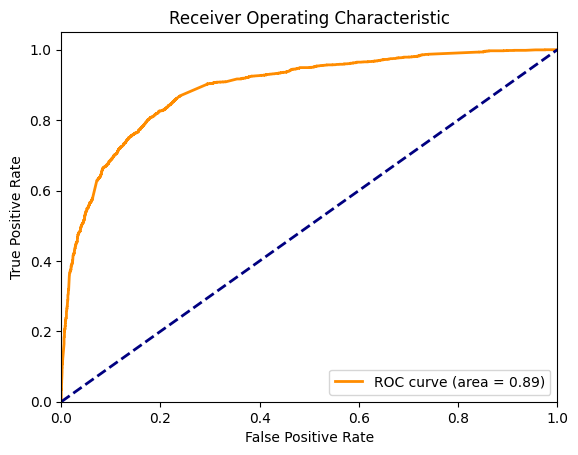

In [90]:
#import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Probablity)  #'Converted' is the target variable

# Calculate the AUC
roc_auc = roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Probablity)


# Drawing ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Finding the Optimal cutoff Point


In [91]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Probablity'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Probablity  LeadId  Predicted_Converted  0.0  0.05  \
0          1              0.649255    4901                    1    1     1   
1          1              0.802624    6624                    1    1     1   
2          0              0.194299     762                    0    1     1   
3          0              0.239009    2007                    0    1     1   
4          1              0.256104    3441                    0    1     1   

   0.1  0.15  0.2  0.25  ...  0.5  0.55  0.6  0.65  0.7  0.75  0.8  0.85  0.9  \
0    1     1    1     1  ...    1     1    1     0    0     0    0     0    0   
1    1     1    1     1  ...    1     1    1     1    1     1    1     0    0   
2    1     1    0     0  ...    0     0    0     0    0     0    0     0    0   
3    1     1    1     0  ...    0     0    0     0    0     0    0     0    0   
4    1     1    1     1  ...    0     0    0     0    0     0    0     0    0   

   0.95  
0     0  
1     0  
2     0  
3     0  
4     0  

[5 rows x 24 columns]

In [92]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.382387  1.000000  0.000000
0.05  0.05  0.474239  0.993543  0.152719
0.10  0.10  0.611193  0.965131  0.392058
0.15  0.15  0.708148  0.932415  0.569296
0.20  0.20  0.763457  0.908308  0.673774
0.25  0.25  0.780741  0.901851  0.705757
0.30  0.30  0.804774  0.844598  0.780117
0.35  0.35  0.812675  0.815325  0.811034
0.40  0.40  0.815144  0.774860  0.840085
0.45  0.45  0.820082  0.743866  0.867271
0.50  0.50  0.818765  0.704262  0.889659
0.55  0.55  0.818107  0.673698  0.907516
0.60  0.60  0.813827  0.636677  0.923507
0.65  0.65  0.796049  0.556177  0.944563
0.70  0.70  0.788807  0.523461  0.953092
0.75  0.75  0.781070  0.489884  0.961354
0.80  0.80  0.769712  0.445545  0.970416
0.85  0.85  0.753416  0.387430  0.980011
0.90  0.90  0.712922  0.268188  0.988273
0.95  0.95  0.690370  0.201033  0.993337


The printed value shows for cutoff value of 0.35 the sensitivity and specificity and accuracy are almost equal. Thus 0.35 is the optimized value of cutoff to be used for prediction. Let us show same thing by ploting the three curves vs cutoff values.

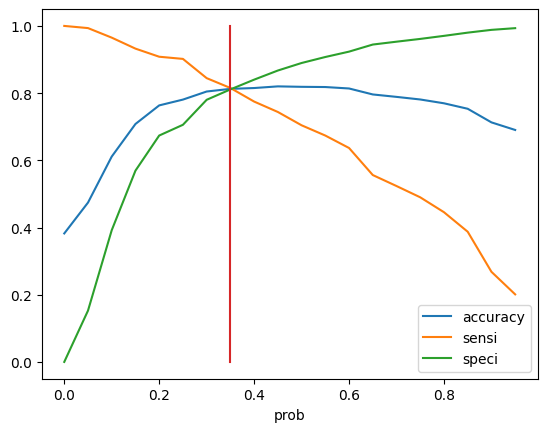

In [93]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.plot([0.35,0.35],[0,1])
plt.show()

FThus 0.35 is the approx. point where all the curves meet, so 0.35 will be Optimal cutoff point for probability threshold.

# Let us make the final prediction using 0.35 as the cut off that gives best accuracy, sensitivity and specificty all almost equal to 81%.


In [94]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Probablity'].map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()


Converted  Converted_Probablity  LeadId  Predicted_Converted  0.0  0.05  \
0          1              0.649255    4901                    1    1     1   
1          1              0.802624    6624                    1    1     1   
2          0              0.194299     762                    0    1     1   
3          0              0.239009    2007                    0    1     1   
4          1              0.256104    3441                    0    1     1   

   0.1  0.15  0.2  0.25  ...  0.55  0.6  0.65  0.7  0.75  0.8  0.85  0.9  \
0    1     1    1     1  ...     1    1     0    0     0    0     0    0   
1    1     1    1     1  ...     1    1     1    1     1    1     0    0   
2    1     1    0     0  ...     0    0     0    0     0    0     0    0   
3    1     1    1     0  ...     0    0     0    0     0    0     0    0   
4    1     1    1     1  ...     0    0     0    0     0    0     0    0   

   0.95  final_predicted  
0     0                1  
1     0                1  
2     0                0  
3     0                0  
4     0                0  

[5 rows x 25 columns]

Let us now calculate all metrics using confusion matrix for Train using final prediction and Lead score as well as acccuracy predicted final convertions.

In [95]:
#confusion matrix
# Finding Confusion metrics for 'y_train_pred_final'.
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

print("Confusion Matrix")
print("-"*50,"\n")
print(confusion_matrix,"\n")
print("-"*50,"\n")

TN =confusion_matrix[0,0]
TP =confusion_matrix[1,1]
FP =confusion_matrix[0,1]
FN =confusion_matrix[1,0]

accuracy = (TN+TP)/(TN+TP+FN+FP)
sensi = TP/(TP+FN)
speci = TN/(TN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)

#Calculate false postive rate - predicting conversion when customer does not have converted
FPR = FP/(FP + TN)
FNR = FN/(FN +TP)

print ("True Negative                    : ", TN)
print ("True Positive                    : ", TP)
print ("False Negative                   : ", FN)
print ("False Positve                    : ", FP)

print ("Model Accuracy                   : ", round(accuracy,4))
print ("Model Sensitivity                : ", round(sensi,4))
print ("Model Specificity                : ", round(speci,4))
print ("Model Precision                  : ", round(precision,4))
print ("Model Recall                     : ", round(recall,4))
print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
print ("Model False Positive Rate (FPR)  : ", round(FPR,4))


Confusion Matrix
-------------------------------------------------- 

[[3043  709]
 [ 429 1894]] 

-------------------------------------------------- 

True Negative                    :  3043
True Positive                    :  1894
False Negative                   :  429
False Positve                    :  709
Model Accuracy                   :  0.8127
Model Sensitivity                :  0.8153
Model Specificity                :  0.811
Model Precision                  :  0.7276
Model Recall                     :  0.8153
Model True Positive Rate (TPR)   :  0.8153
Model False Positive Rate (FPR)  :  0.189


#Let us generate Lead Score

In [107]:
# Calculate the lead score: Scaling probabilities by brom 0 to 100.
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Probablity.map(lambda x: round(x*100))
y_train_pred_final.head(25)

Converted  Converted_Probablity  LeadId  Predicted_Converted  0.0  0.05  \
0           1              0.649255    4901                    1    1     1   
1           1              0.802624    6624                    1    1     1   
2           0              0.194299     762                    0    1     1   
3           0              0.239009    2007                    0    1     1   
4           1              0.256104    3441                    0    1     1   
5           0              0.130192    6365                    0    1     1   
6           0              0.085726    5243                    0    1     1   
7           0              0.059667    7933                    0    1     1   
8           0              0.128234    8579                    0    1     1   
9           1              0.808043    9171                    1    1     1   
10          1              0.859547    6532                    1    1     1   
11          1              0.125445    5606                    0    1     1   
12          1              0.783222    6755                    1    1     1   
13          1              0.059667     613                    0    1     1   
14          1              0.826554    5732                    1    1     1   
15          0              0.059667    5763                    0    1     1   
16          0              0.468079    8647                    0    1     1   
17          1              0.815716     693                    1    1     1   
18          0              0.374515    7861                    0    1     1   
19          0              0.127467    3082                    0    1     1   
20          0              0.502945    7928                    1    1     1   
21          1              0.636180    8635                    1    1     1   
22          0              0.059667    2106                    0    1     1   
23          0              0.256104    6437                    0    1     1   
24          0              0.101581    4895                    0    1     1   

    0.1  0.15  0.2  0.25  ...  0.65  0.7  0.75  0.8  0.85  0.9  0.95  \
0     1     1    1     1  ...     0    0     0    0     0    0     0   
1     1     1    1     1  ...     1    1     1    1     0    0     0   
2     1     1    0     0  ...     0    0     0    0     0    0     0   
3     1     1    1     0  ...     0    0     0    0     0    0     0   
4     1     1    1     1  ...     0    0     0    0     0    0     0   
5     1     0    0     0  ...     0    0     0    0     0    0     0   
6     0     0    0     0  ...     0    0     0    0     0    0     0   
7     0     0    0     0  ...     0    0     0    0     0    0     0   
8     1     0    0     0  ...     0    0     0    0     0    0     0   
9     1     1    1     1  ...     1    1     1    1     0    0     0   
10    1     1    1     1  ...     1    1     1    1     1    0     0   
11    1     0    0     0  ...     0    0     0    0     0    0     0   
12    1     1    1     1  ...     1    1     1    0     0    0     0   
13    0     0    0     0  ...     0    0     0    0     0    0     0   
14    1     1    1     1  ...     1    1     1    1     0    0     0   
15    0     0    0     0  ...     0    0     0    0     0    0     0   
16    1     1    1     1  ...     0    0     0    0     0    0     0   
17    1     1    1     1  ...     1    1     1    1     0    0     0   
18    1     1    1     1  ...     0    0     0    0     0    0     0   
19    1     0    0     0  ...     0    0     0    0     0    0     0   
20    1     1    1     1  ...     0    0     0    0     0    0     0   
21    1     1    1     1  ...     0    0     0    0     0    0     0   
22    0     0    0     0  ...     0    0     0    0     0    0     0   
23    1     1    1     1  ...     0    0     0    0     0    0     0   
24    1     0    0     0  ...     0    0     0    0     0    0     0   

    final_predicted  lead_score  final_predicted_1  
0                 1    

*- "The target lead conversion rate, which is also reflected by the model's sensitivity, is approximately 81%. Therefore, our finalized Model 8 has achieved the target lead conversion rate of 80% desired by Xeducation's CEO.*

Over all performance
- Accuracy (81.27%): The model correctly predicts the outcome (conversion or non-conversion) for about 81% of the leads. This indicates a good overall performance.

- Sensitivity (Recall, TPR) (81.53%): The model correctly identifies about 81% of the leads who actually convert. This is a crucial metric for lead scoring, as it reflects the ability to capture potential customers. This meets the CEO's target of 80% conversion rate, which is a significant achievement.

- Specificity (81.1%): The model correctly identifies about 81% of the leads who do not convert. This shows the model's ability to avoid wasting resources on unlikely leads.

- Precision (72.76%): Out of all the leads the model predicts will convert, about 73% actually do. This indicates the model's reliability in identifying potential customers. While lower than sensitivity, it is still reasonably good.

- Recall Score (81.53%): The recall score is identical to the sensitivity and the true positive rate (TPR) in our case. It represents the model's ability to find all the relevant cases within a dataset. In the context of lead scoring, it reflects the percentage of actual conversions that the model correctly identifies as potential conversions.

- False Positive Rate (FPR) (18.9%): About 19% of the leads who do not convert are incorrectly predicted as potential customers. This is a relatively low FPR, indicating the model is not overly aggressive in identifying potential customers.

**Lead Score**
- Top Priority leads are those with Lead Score > 70: These leads have the highest conversion probability. (**HOT LEADS**)
- Medium Priority leads are those with Lead Score 50-70. Intermediate probability of conversion.
- Low Priority are those with Lead Score 30-50.


#Precision and recall tradeoff
Given that our current model's sensitivity surpasses the CEO's target of 80%, we'll conduct a comparative analysis using Precision-Recall and Specificity-Sensitivity metrics to determine if further refinements can be made to the probability threshold without compromising the achieved conversion rate.

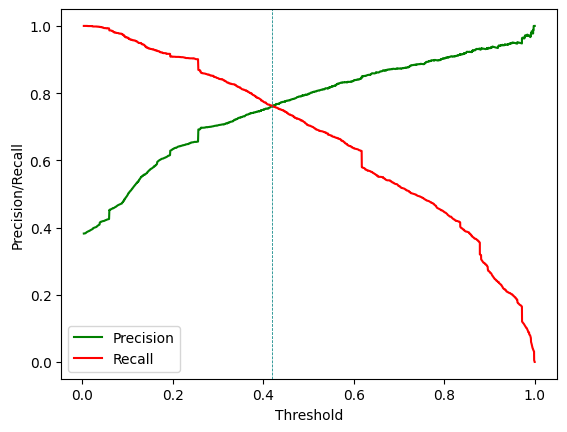

In [97]:
from sklearn.metrics import precision_recall_curve
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Probablity'])
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.42, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

The model achives balance between precision and recall for probability threshold of about 0.42 aprrox.

In [98]:
#Let us now generate prediction using probablity threshold of 0.42 obtained by precision-recall tradeoff.
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Converted_Probablity'].map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head(5)

Converted  Converted_Probablity  LeadId  Predicted_Converted  0.0  0.05  \
0          1              0.649255    4901                    1    1     1   
1          1              0.802624    6624                    1    1     1   
2          0              0.194299     762                    0    1     1   
3          0              0.239009    2007                    0    1     1   
4          1              0.256104    3441                    0    1     1   

   0.1  0.15  0.2  0.25  ...  0.65  0.7  0.75  0.8  0.85  0.9  0.95  \
0    1     1    1     1  ...     0    0     0    0     0    0     0   
1    1     1    1     1  ...     1    1     1    1     0    0     0   
2    1     1    0     0  ...     0    0     0    0     0    0     0   
3    1     1    1     0  ...     0    0     0    0     0    0     0   
4    1     1    1     1  ...     0    0     0    0     0    0     0   

   final_predicted  lead_score  final_predicted_1  
0                1          65                  1  
1                1          80                  1  
2                0          19                  0  
3                0          24                  0  
4                0          26                  0  

[5 rows x 27 columns]

In [99]:
#All metrices with pred with new threshols i.e., y_train_pred_final['final_predicted_1']
#confusion matrix
# Finding Confusion metrics for 'y_train_pred_final'.
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted_1'])

print("Confusion Matrix")
print("-"*50,"\n")
print(confusion_matrix,"\n")
print("-"*50,"\n")

TN =confusion_matrix[0,0]
TP =confusion_matrix[1,1]
FP =confusion_matrix[0,1]
FN =confusion_matrix[1,0]

accuracy = (TN+TP)/(TN+TP+FN+FP)
sensi = TP/(TP+FN)
speci = TN/(TN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)

#Calculate false postive rate - predicting conversion when customer does not have converted
FPR = FP/(FP + TN)
FNR = FN/(FN +TP)

print ("True Negative                    : ", TN)
print ("True Positive                    : ", TP)
print ("False Negative                   : ", FN)
print ("False Positve                    : ", FP)

print ("Model Accuracy                   : ", round(accuracy,4))
print ("Model Sensitivity                : ", round(sensi,4))
print ("Model Specificity                : ", round(speci,4))
print ("Model Precision                  : ", round(precision,4))
print ("Model Recall                     : ", round(recall,4))
print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
print ("Model False Positive Rate (FPR)  : ", round(FPR,4))


Confusion Matrix
-------------------------------------------------- 

[[3197  555]
 [ 553 1770]] 

-------------------------------------------------- 

True Negative                    :  3197
True Positive                    :  1770
False Negative                   :  553
False Positve                    :  555
Model Accuracy                   :  0.8176
Model Sensitivity                :  0.7619
Model Specificity                :  0.8521
Model Precision                  :  0.7613
Model Recall                     :  0.7619
Model True Positive Rate (TPR)   :  0.7619
Model False Positive Rate (FPR)  :  0.1479


As we can see that when using prob threshold of 0.42 based on precision-recall tradeoff, the value of sensitivity, precision and recall decreases to around 0.76, which is less than the target coversion rate of 80% desired by Xeducation CEO. Previous analysis has shown that a threshold of 0.35 (based on sensitivity-specificity tradeoff) these numbers were around 0.81. So, we will select  sensitivity-specificity view for our Optimal cut-off (i.e., 0.35) for final predictions.

#Validation of Model 8 by making prediction on test data (X_test) and comparing with y_test..

In [100]:
#prediction using test features.
X_test_selected_sm = sm.add_constant(X_test_selected)
y_test_pred=res.predict(X_test_selected_sm)
print(X_test_selected_sm.shape)

(2604, 15)


In [101]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.06013601, 0.04552038, 0.18187997, 0.86681082, 0.56832059,
       0.85355038, 0.25725747, 0.99181265, 0.33043967, 0.02535563])

In [102]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Probablity':y_test_pred})
y_test_pred_final['LeadId'] = y_test.index
y_test_pred_final.head(5)

Converted  Converted_Probablity  LeadId
0          0              0.060136    3423
1          0              0.045520    7935
2          0              0.181880    3009
3          1              0.866811    7432
4          0              0.568321    5038

In [103]:
y_test_pred_final['final_predicted'] = y_test_pred_final['Converted_Probablity'].map( lambda x: 1 if x > 0.35 else 0)

y_test_pred_final.head(5)

Converted  Converted_Probablity  LeadId  final_predicted
0          0              0.060136    3423                0
1          0              0.045520    7935                0
2          0              0.181880    3009                0
3          1              0.866811    7432                1
4          0              0.568321    5038                1

In [104]:
#Let us add lead score also.Scaling probabilities by brom 0 to 100.
y_test_pred_final['lead_score'] = y_test_pred_final.Converted_Probablity.map(lambda x: round(x*100))
y_test_pred_final.head(5)

Converted  Converted_Probablity  LeadId  final_predicted  lead_score
0          0              0.060136    3423                0           6
1          0              0.045520    7935                0           5
2          0              0.181880    3009                0          18
3          1              0.866811    7432                1          87
4          0              0.568321    5038                1          57

In [105]:
# let us now calculate all performance metrices.
#All metrices with pred with new threshols i.e., y_train_pred_final['final_predicted_1']
#confusion matrix
# Finding Confusion metrics for 'y_train_pred_final'.
confusion_matrix = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['final_predicted'])

print("Confusion Matrix")
print("-"*50,"\n")
print(confusion_matrix,"\n")
print("-"*50,"\n")

TN =confusion_matrix[0,0]
TP =confusion_matrix[1,1]
FP =confusion_matrix[0,1]
FN =confusion_matrix[1,0]

accuracy = (TN+TP)/(TN+TP+FN+FP)
sensi = TP/(TP+FN)
speci = TN/(TN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)

#Calculate false postive rate - predicting conversion when customer does not have converted
FPR = FP/(FP + TN)
FNR = FN/(FN +TP)

print ("True Negative                    : ", TN)
print ("True Positive                    : ", TP)
print ("False Negative                   : ", FN)
print ("False Positve                    : ", FP)

print ("Model Accuracy                   : ", round(accuracy,4))
print ("Model Sensitivity                : ", round(sensi,4))
print ("Model Specificity                : ", round(speci,4))
print ("Model Precision                  : ", round(precision,4))
print ("Model Recall                     : ", round(recall,4))
print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
print ("Model False Positive Rate (FPR)  : ", round(FPR,4))


Confusion Matrix
-------------------------------------------------- 

[[1299  296]
 [ 212  797]] 

-------------------------------------------------- 

True Negative                    :  1299
True Positive                    :  797
False Negative                   :  212
False Positve                    :  296
Model Accuracy                   :  0.8049
Model Sensitivity                :  0.7899
Model Specificity                :  0.8144
Model Precision                  :  0.7292
Model Recall                     :  0.7899
Model True Positive Rate (TPR)   :  0.7899
Model False Positive Rate (FPR)  :  0.1856


Hence we can see that the final prediction of conversions  (sensitivity) have a target rate of 79% (78.99%) (Around 1 % short of the predictions made on training data set).

NOTE: The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

For Test set
Accuracy : 80.49%
Sensitivity : 78.99% ≈ 79%
Specificity : 81.44%

These matrics are very close to train set, so out final model logm3 is performing with good consistency on both Train & Test set, and is also giving final prediction of conversions 79% which very close to 80% desired by X education CEO.

Overall Significance:

The final model metrics suggest that Model 8 is a valuable tool for lead scoring. It achieves a high conversion rate (sensitivity), meeting the CEO's target, while maintaining good overall accuracy and specificity. There is a slight trade-off with precision, but it is still within an acceptable range. The low FPR suggests the model is effective in minimizing wasted resources on unlikely leads.

In conclusion, Model 8 demonstrates a strong ability to identify potential customers, align with business goals, and improve sales team efficiency.

#About Final Model

In [106]:
# features and their coefficicent from final model
parameters=res.params.sort_values(ascending=False)
parameters

Lead Origin_Lead Add Form                               4.315643
What is your current occupation_Working Professional    2.728219
Lead Source_Olark Chat                                  1.272080
Total Time Spent on Website                             1.118258
Last Activity_SMS Sent                                  0.381176
const                                                  -0.196029
Last Activity_Converted to Lead                        -0.777787
Last Activity_Email Bounced                            -0.918849
Last Notable Activity_Email Opened                     -1.163690
Last Notable Activity_Page Visited on Website          -1.277239
Last Activity_Olark Chat Conversation                  -1.335138
Do Not Email                                           -1.371936
Last Notable Activity_Modified                         -1.519683
Last Notable Activity_Email Link Clicked               -1.715187
Last Notable Activity_Olark Chat Conversation          -1.973961
dtype: float64

NOTE: A high positive coefficient for 'Lead Origin_Lead Add Form'and 'What is your current occupation_Working Professional', indicates these variable has stronger influence on predicting the probability of leads converting to take up X-Education's course.

# Conclusion


*   We successfully developed a logistic regression model using lead data provided.
*   Using RFE, p-value and VIF analysis, we have selected most important features giving stable model with consistent results on train as well as test dataset.


*   The finalised model have 14 features, which is less than 15 as desired by the given instructions.
*   We did both Sensitivity-Specificity as well as Precision-Recall tradeoff analysis giving probability optimal cutoff of 0.35 and 0.42, respectively.

*   The Model performance metrics shows that with threshold of 0.42 decreases the sensitivity to 76%, while with a cutoff of 0.35 the sensitivity is around 80% (81% and 79%, respectively, on train and test data.)
* Since X-Education CEO has asked a sensitivity of around 80%, therefore cutoff of 0.35 based on sensitivity-specificity metrics is finalised.
The model can identify high-potential leads (also called Hot Leads) twith improved conversion rate of around 80% as desired by the business goal.
The top 3 variables that contribute for lead getting converted in the model are:
- Lead Origin_Lead Add Form,
- What is your current occupation_Working professionals, and
- Lead Source_Olark Chat

Over all final model gives good and stable results.